# Preprocess

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('peck_seq.xlsx')
df = df.drop('номер/имя цыпленка', axis=1, inplace=False)
df.head()
df_test = df.iloc[23:, :60]
df = df.iloc[:21]

# na = [col if round(100*df[col].isna().sum()/len(df), 2)!=0 else -1 for col in df.columns.to_list()]
# # print(na)#there're couple of skipped cells
df = df.fillna(0)
df_test = df_test.fillna(0)

df.replace('желтаяел', 'желтая', inplace=True)
df.replace('желтая ', 'желтая', inplace=True)
df.replace('золотаяотая', 'золотая', inplace=True)
df.replace('золотая ', 'золотая', inplace=True)

df_test.replace('желтаяел', 'желтая', inplace=True)
df_test.replace('желтая ', 'желтая', inplace=True)
df_test.replace('золотаяотая', 'золотая', inplace=True)
df_test.replace('золотая ', 'золотая', inplace=True)


#Ekatherina told

df.replace('алая', 'красная', inplace=True)
df_test.replace('алая', 'красная', inplace=True)
df.replace('зеленая ', 'зеленая', inplace=True)
df_test.replace('зеленая ', 'зеленая', inplace=True)

unique = pd.unique(df.values.ravel())
# print(unique)
unique = unique[[1,0,2,3,4,5,6,7]]
print(unique)

col_dict = {unique[i]: i for i in range(len(unique))}
col_dict[0] = 0
print(col_dict)

for item in col_dict:
    df.replace(item, col_dict[item], inplace=True)
    df_test.replace(item, col_dict[item], inplace=True)
df_test.columns = np.arange(81, 141)
df_test.index = np.arange(0,21)
display(df.head(2), df_test.head(2))

X_train, X_test = df.to_numpy(), df_test.to_numpy()
X = np.concatenate((X_train, X_test),axis = 1).flatten()
serie_length = 140
X_train.shape

[0 'синяя' 'зеленая' 'белая' 'черная' 'желтая' 'золотая' 'красная']
{0: 0, 'синяя': 1, 'зеленая': 2, 'белая': 3, 'черная': 4, 'желтая': 5, 'золотая': 6, 'красная': 7}


<ipython-input-11-b948b17e2038>:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test = df_test.fillna(0)
<ipython-input-11-b948b17e2038>:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(item, col_dict[item], inplace=True)
<ipython-input-11-b948b17e2038>:45: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
0,1,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,3,1
1,5,5,0,2,3,3,6,0,6,5,...,0,0,0,0,0,0,0,0,0,0


,81,82,83,84,85,86,87,88,89,90,...,131,132,133,134,135,136,137,138,139,140
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(21, 80)

#Here I'm checking for skipping a peck frequency:
I presume that separators in the original xlsx file are meant to represent series of training for the chicks (4 series 20 pecks (or no pecks) each).
I'm counting how many times the bird considered a bead inedible out of twenty opportunities to peck

Text(0, 0.5, 'resultive peck frequency')

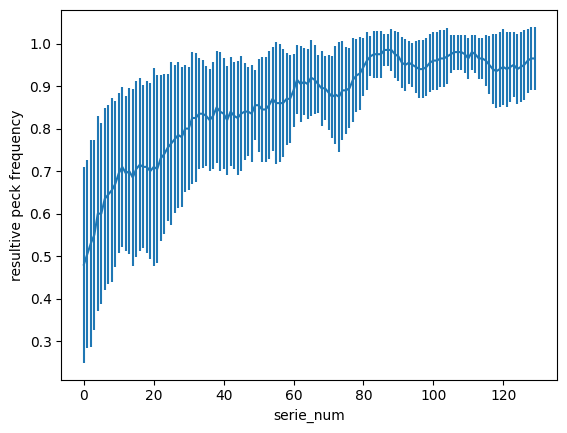

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output


df_full = pd.concat([df, df_test], axis = 1)
window_size = 10

freq = {'idx': np.arange(1, 22, 1)}
freq = pd.DataFrame(freq)
freq = freq.set_index('idx')
#implementing sliding window

for ser in range(len(df_full.columns)-window_size):
    freq[ser] = (
        (df_full[np.arange(ser+1,ser+window_size+1)]==0)
            .sum(axis = 1)
            /window_size
            # .to_list()
    )


draw = freq.T

clear_output(wait=True)

plt.errorbar(draw.index, draw.mean(axis = 1), yerr=draw.std(axis = 1))

# for col in draw.columns:
#     plt.plot(draw.index, draw[col])
plt.xlabel('serie_num')
plt.ylabel('resultive peck frequency')


#Here's the function that trains the hmm model which would be further used

here's the extensive docstring for the method

    X: array-like flattened chain array

    lengths: array of lengths of chains

    model_samples_num = 10: number of times we refit the model with data

    n_components = None: array of number of components of the model
    unless provided in form of an array it is set as np.arange(n_possible_obs, n_possible_obs*2, n_possible_obs)
    
    loc_emission: boolean if checked True we set the emission matrix
    ___________
    returns:
    best_model: hmmlearn.hmm.CategoricalHMM -- model with the highest score
    model_scores: pandas.Dataframe -- dateset with scores of all models created

In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import CategoricalHMM
from tqdm import tqdm
from collections import Counter, OrderedDict
from math import floor, ceil

class ModelWrap:

    def __init__(
        self,
        X,
        lengths
        ):
        '''
        X: array-like flattened chain array
        lengths: array of lengths of chains
        '''
        self.n_possible_obs = np.unique(X).shape[0]
        self.X = X.reshape(-1,1)
        self.lengths = lengths
        self.lock_emission = None
        self.components_per_state = None
        self.model = None

    def fit_model(
        self,
        num_reruns = 10,
        n_components = None,
        lock_emission = False,
        account_frequencies = False,
    ):
        '''
        model is created fitted and now can be used
        statistics of training saved

        model_samples_num = 10: nomber of times we refit the model with data
        n_components = None: array of number of components of the model
        loc_emission: boolean if checked True we set the emission matrix
        account_frequencies: boolean if checked states for observations are distributed propotionally to frequencies of these observations
        ___________
        returns:
        nothing
        '''
        components_per_state = None
        if account_frequencies:
            if not lock_emission:
                print("account_frequencies is set to True\nsetting lock_emission to True")
            self.lock_emission = True
        else:
            self.lock_emission = lock_emission

        if (self.lock_emission) and not(n_components):
            print("you can't set the n_components if lock_emission is checked True\nsetting n_components to None")
            n_components = None

        if n_components is None:
            if account_frequencies:
                frequencies = OrderedDict(sorted(Counter(self.X.flatten()).items()))
                components_per_state = np.array([max(2,min(6, floor(frequencies[i]/len(self.X)*100))) for i in frequencies.keys()])
                n_components = [components_per_state.sum()]
            elif lock_emission:
                n_components = np.arange(self.n_possible_obs, self.n_possible_obs*3+1, self.n_possible_obs)
            else:
                n_components = np.arange(self.n_possible_obs, self.n_possible_obs*3, self.n_possible_obs//2)

        best_score = best_model = None

        model_scores = {
            'idx': [],
            'n_comp': [],
            'score': [],
            }

        model_scores = pd.DataFrame(model_scores).set_index('idx')

        for n in tqdm(n_components):
            rs = np.random.randint(low = 0, high = 100, size=num_reruns)
            for r in rs:
                if self.lock_emission:
                    model = CategoricalHMM(
                    n_components=n,
                    random_state=r,
                    init_params='st',
                    )
                    if account_frequencies:
                        emprob = np.zeros((n,self.n_possible_obs))
                        diag = [[i]*(components_per_state[i]) for i in range(self.n_possible_obs)]
                        diag = [x for xs in diag for x in xs]
                        diag = np.array(diag).flatten()
                        for i in range(len(diag)):
                            emprob[i, diag[i]] = 1
                    else:
                        emprob = np.zeros((n,self.n_possible_obs))
                        diag = np.array([[i]*(n//self.n_possible_obs) for i in range(self.n_possible_obs)]).flatten()
                        components_per_state = np.array([(n//self.n_possible_obs) for i in range(self.n_possible_obs)])
                        for i in range(len(diag)):
                            emprob[i, diag[i]] = 1
                    model.emissionprob_ = emprob
                else:
                    model = CategoricalHMM(
                    n_components=n,
                    random_state=r,
                    )

                model.fit(
                    self.X,
                    lengths = self.lengths
                    )
                score = model.score(self.X, lengths=self.lengths)/np.sum(self.lengths)
                model_scores.loc[len(model_scores)+1] = [n, score]
                if best_score is None or score > best_score:
                    best_model = model
                    best_score = score
                    self.components_per_state = components_per_state

        self.model = best_model
        self.scores = model_scores
        self.startprob_ = best_model.startprob_

    def draw_heatmap(self, matrix_type, ax, add_title = ''):
        '''
        matrix_type: 'emission', 'transition' -- what type of matrix is wanted displayed
        ax: matplotlib.axes -- axes where the heatmap is plotted
        add_title: string -- additional info for title
        '''
        if matrix_type == 'emission':
            sns.heatmap(self.model.emissionprob_, linewidths=0.5, linecolor='white', ax = ax)
            ax.set_title(add_title + ' emission mat')
        if matrix_type == 'transition':
            if self.lock_emission:
                sns.heatmap(self.model.transmat_, ax = ax)
                x = self.components_per_state[0]
                ax.axvline(x=x, linestyle='--', color='lightgray')
                ax.axhline(y=x, linestyle='--', color='lightgray')
                for i in self.components_per_state[1:]:
                    x+=i
                    ax.axvline(x=x, linestyle='--', color='lightgray')
                    ax.axhline(y=x, linestyle='--', color='lightgray')
            else: sns.heatmap(self.model.transmat_, linewidths=0.5, linecolor='white', ax = ax)
            ax.set_title(add_title+' transition mat')
            if self.components_per_state is not None:
                ax.set_xticks(np.cumsum(self.components_per_state))
                ax.set_yticks(np.cumsum(self.components_per_state))
                ax.set_xticklabels(sorted(np.unique(self.X)))
                ax.set_yticklabels(sorted(np.unique(self.X)))

    def bar_scores(self, ax):
        '''
        ax: matplotlib.axes
        '''
        df = pd.concat([self.scores.groupby(by = 'n_comp').mean().rename(columns={'score':'mean_score'}), self.scores.groupby(by = 'n_comp').std().rename(columns={'score':'std_score'})], axis = 1)
        df['number_components'] = df.index
        df['idx'] = np.arange(len(df))
        df.set_index('idx', inplace=True)

        barplot = sns.barplot(x='number_components', y='mean_score', data=df, color='lightblue', errorbar=None, ax = ax)

        # Add error bars
        for index, row in df.iterrows():
            ax.errorbar(x=index, y=row['mean_score'], yerr=row['std_score'], fmt='none', color='black', capsize=5)
        ax.set_title('Average scores')
        ax.set_xlabel('number of components')
        ax.set_ylabel('score')

    def predict_distr_for_all(self, obs_seq, uniform_initial = False):
        # print(self.model.startprob_prior)
        if uniform_initial:
            self.model.startprob_ = np.ones(self.model.transmat_.shape[0])/self.model.transmat_.shape[0]
        else:
            self.model.startprob_ = self.startprob_
        last_state_proba = self.model.predict_proba(obs_seq.reshape(-1,1))
        # print(self.model.emissionprob_.T.shape, self.model.transmat_.T.shape, last_state_proba.shape)
        return np.matmul(self.model.emissionprob_.T, np.matmul(self.model.transmat_.T, last_state_proba.T))


In [ ]:
frequencies = OrderedDict(sorted(Counter(X.flatten()).items()))
for k, v in frequencies.items():
    frequencies[k]/=len(X.flatten())
    print("%1.4f"%frequencies[k], end = '&', )


0.8493&0.0282&0.0095&0.0170&0.0068&0.0561&0.0316&0.0014&

## Score vs components for shuffled and unshuffled sequences

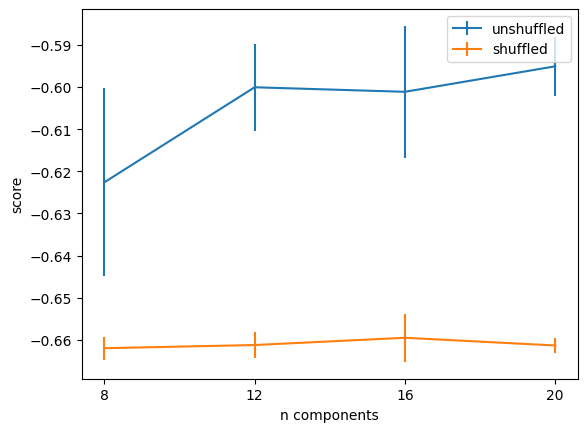

In [ ]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X.reshape(-1, 140), axis = 1).flatten()

model_wrapper = ModelWrap(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

shuffled_wrapper = ModelWrap(
    X_shuffled,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

# random_wrapper = ModelWrap(
#     np.random.randint(0,10, X.shape),
#     lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
# )

model_wrapper.fit_model(num_reruns = 5)
shuffled_wrapper.fit_model(num_reruns = 5)
# random_wrapper.fit_model(num_reruns = 50)

from IPython.display import clear_output

# fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (15, 5))
plt.errorbar(
    pd.unique(model_wrapper.scores['n_comp']),
    model_wrapper.scores.groupby(model_wrapper.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = model_wrapper.scores.groupby(model_wrapper.scores['n_comp']).std().to_numpy().flatten(),
    label = 'unshuffled')
plt.errorbar(
    pd.unique(shuffled_wrapper.scores['n_comp']),
    shuffled_wrapper.scores.groupby(shuffled_wrapper.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = shuffled_wrapper.scores.groupby(shuffled_wrapper.scores['n_comp']).std().to_numpy().flatten(),
    label = 'shuffled')

# plt.errorbar(
#     pd.unique(random_wrapper.scores['n_comp']),
#     random_wrapper.scores.groupby(random_wrapper.scores['n_comp']).mean().to_numpy().flatten(),
#     yerr = random_wrapper.scores.groupby(random_wrapper.scores['n_comp']).std().to_numpy().flatten(),
#     label = 'random')

plt.xticks(pd.unique(shuffled_wrapper.scores['n_comp']))
plt.xlabel('n components')
plt.ylabel('score')
plt.legend()
clear_output(wait = True)

## Same for no zeroes

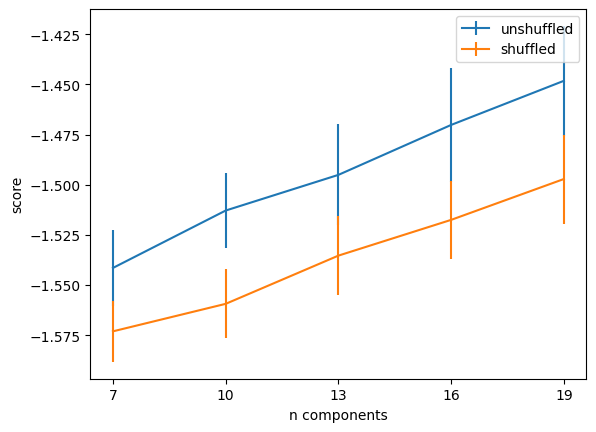

In [ ]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X.reshape(-1, 140), axis = 1).flatten()

X_nz = X[X>0]
lengths_nz = [len(x[x>0]) for x in X.reshape(-1, 140)]

X_nz_shuffled = X_shuffled[X_shuffled>0]
lengths_nz_shuffled = [len(x[x>0]) for x in X_shuffled.reshape(-1, 140)]

model_wrapper_nz = ModelWrap(
    X_nz,
    lengths = lengths_nz
)

shuffled_wrapper_nz = ModelWrap(
    X_nz_shuffled,
    lengths = lengths_nz_shuffled
)

model_wrapper_nz.fit_model(num_reruns = 50)
shuffled_wrapper_nz.fit_model(num_reruns = 50)

from IPython.display import clear_output

# fig, ax = plt.subplots(1, 2, constrained_layout = True, figsize = (15, 5))
plt.errorbar(
    pd.unique(model_wrapper_nz.scores['n_comp']),
    model_wrapper_nz.scores.groupby(model_wrapper_nz.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = model_wrapper_nz.scores.groupby(model_wrapper_nz.scores['n_comp']).std().to_numpy().flatten(),
    label = 'unshuffled')
plt.errorbar(
    pd.unique(shuffled_wrapper_nz.scores['n_comp']),
    shuffled_wrapper_nz.scores.groupby(shuffled_wrapper_nz.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = shuffled_wrapper_nz.scores.groupby(shuffled_wrapper_nz.scores['n_comp']).std().to_numpy().flatten(),
    label = 'shuffled')

plt.xticks(pd.unique(shuffled_wrapper_nz.scores['n_comp']))
plt.xlabel('n components')
plt.ylabel('score')
plt.legend()
clear_output(wait = True)


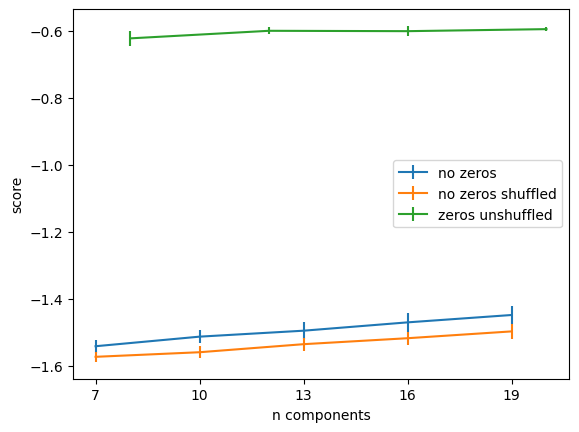

In [ ]:
plt.errorbar(
    pd.unique(model_wrapper_nz.scores['n_comp']),
    model_wrapper_nz.scores.groupby(model_wrapper_nz.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = model_wrapper_nz.scores.groupby(model_wrapper_nz.scores['n_comp']).std().to_numpy().flatten(),
    label = 'no zeros')

plt.errorbar(
    pd.unique(shuffled_wrapper_nz.scores['n_comp']),
    shuffled_wrapper_nz.scores.groupby(shuffled_wrapper_nz.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = shuffled_wrapper_nz.scores.groupby(shuffled_wrapper_nz.scores['n_comp']).std().to_numpy().flatten(),
    label = 'no zeros shuffled')

plt.errorbar(
    pd.unique(model_wrapper.scores['n_comp']),
    model_wrapper.scores.groupby(model_wrapper.scores['n_comp']).mean().to_numpy().flatten(),
    yerr = model_wrapper.scores.groupby(model_wrapper.scores['n_comp']).std().to_numpy().flatten(),
    label = 'zeros unshuffled')
plt.xticks(pd.unique(shuffled_wrapper_nz.scores['n_comp']))
plt.xlabel('n components')
plt.ylabel('score')
plt.legend()
clear_output(wait = True)

## Prediction for getting the same color



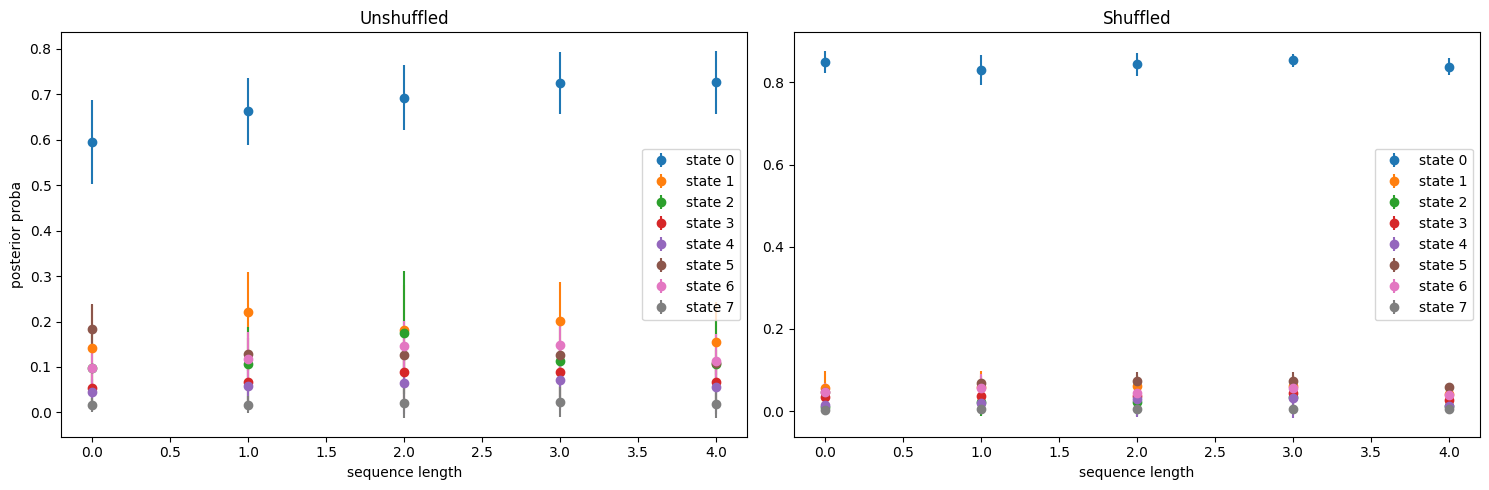

In [ ]:
retake_probas = {}
retake_probas_shuffled = {}
most_frequent = np.unique(X)
# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 5
averaging_num = 50

for mf in tqdm(most_frequent):
    retake_probas[mf] = []
    retake_probas_shuffled[mf] = []
    for i in range(averaging_num):
        model_wrapper.fit_model(num_reruns = 1)
        shuffled_wrapper.fit_model(num_reruns = 1)
        retake_probas[mf].append(model_wrapper.predict_distr_for_all(np.array([mf]*length))[mf,:])
        retake_probas_shuffled[mf].append(shuffled_wrapper.predict_distr_for_all(np.array([mf]*length))[mf,:])
    retake_probas[mf] = np.array(retake_probas[mf]).mean(axis = 0), np.array(retake_probas[mf]).std(axis = 0)
    retake_probas_shuffled[mf] = np.array(retake_probas_shuffled[mf]).mean(axis = 0), np.array(retake_probas_shuffled[mf]).std(axis = 0)
    clear_output(wait = True)

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

print()
for mf in most_frequent:
    print(len(retake_probas[mf]),retake_probas[mf][0].shape)
    ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

#add same for other colors 0 observed probability of observing not zero
#add averaging over seeds for models and make sequences short

#try to get rid of 8 and 9 color due to them being very few

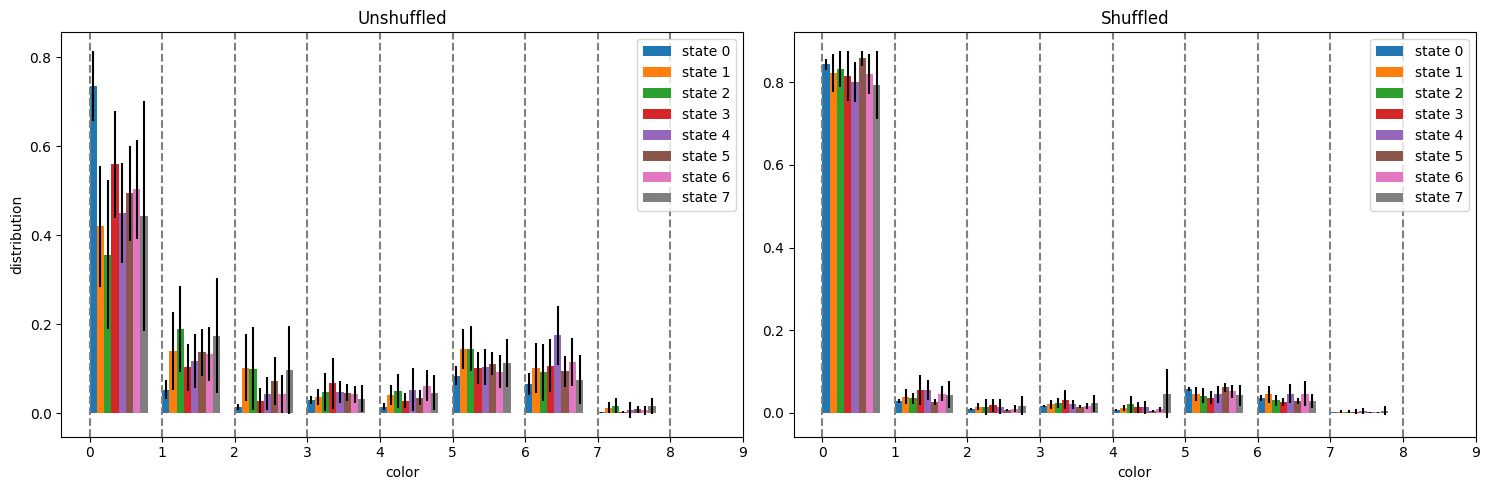

In [ ]:
distr = {}
distr_shuffled = {}
most_frequent = np.unique(X)
# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 5
averaging_num = 50

for mf in tqdm(most_frequent):
    distr[mf] = []
    distr_shuffled[mf] = []
    for i in range(averaging_num):
        model_wrapper.fit_model(num_reruns = 1)
        shuffled_wrapper.fit_model(num_reruns = 1)
        # print(model_wrapper.predict_distr_for_all(np.array([mf]*length)).shape)
        distr[mf].append(model_wrapper.predict_distr_for_all(np.array([mf]*length))[:,-1])
        distr_shuffled[mf].append(shuffled_wrapper.predict_distr_for_all(np.array([mf]*length))[:,-1])
    print(np.array(distr[mf]).shape)
    distr[mf] = np.array(distr[mf]).mean(axis = 0), np.array(distr[mf]).std(axis = 0)
    distr_shuffled[mf] = np.array(distr_shuffled[mf]).mean(axis = 0), np.array(distr_shuffled[mf]).std(axis = 0)
    clear_output(wait = True)

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].bar(np.arange(len(distr[mf][0]))+0.05+0.1*mf, distr[mf][0], yerr = distr[mf][1], label = f'state {mf}', width = 0.1)
    ax[1].bar(np.arange(len(distr_shuffled[mf][0]))+0.05+0.1*mf, distr_shuffled[mf][0], yerr = distr_shuffled[mf][1], label = f'state {mf}', width = 0.1)
    # print(len(distr[mf]),distr[mf][0].shape)
    # ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    # ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

for mf in range(len(most_frequent)+1):
    ax[0].axvline(x = mf, linestyle='--', color='gray')
    ax[1].axvline(x = mf, linestyle='--', color='gray')

ax[0].set_xticks(np.arange(10))
ax[1].set_xticks(np.arange(10))
ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('color')
ax[1].set_xlabel('color')
ax[0].set_ylabel('distribution')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)


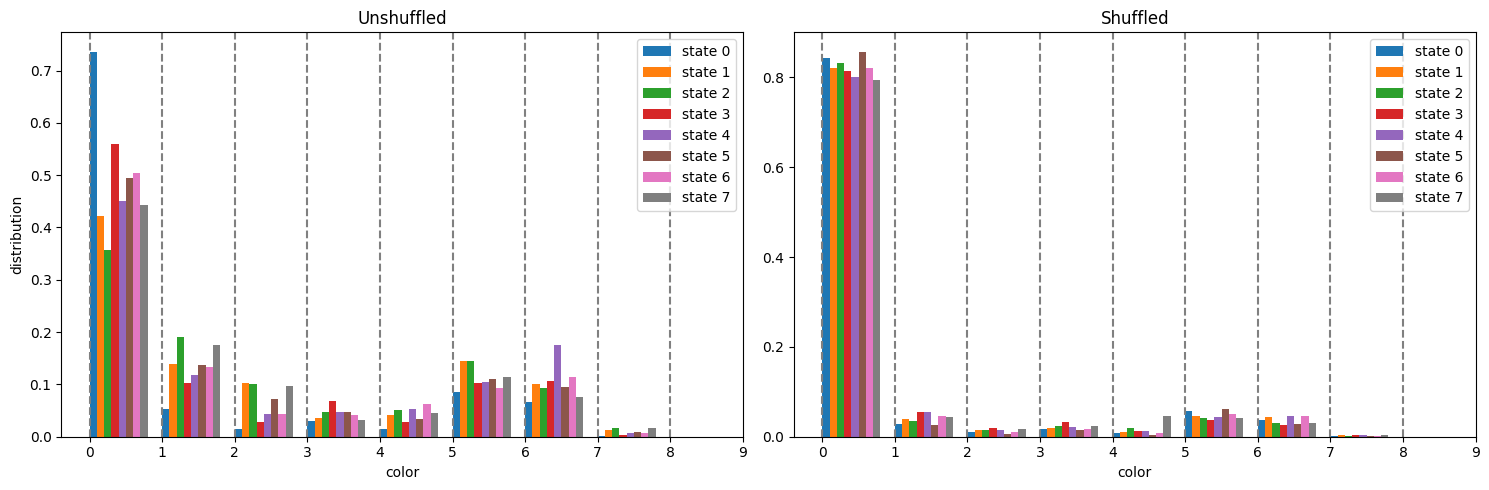

In [ ]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].bar(np.arange(len(distr[mf][0]))+0.05+0.1*mf, distr[mf][0],
              # yerr = distr[mf][1],
              label = f'state {mf}', width = 0.1)
    ax[1].bar(np.arange(len(distr_shuffled[mf][0]))+0.05+0.1*mf, distr_shuffled[mf][0],
              # yerr = distr_shuffled[mf][1],
              label = f'state {mf}', width = 0.1)
    print(len(distr[mf]),distr[mf][0].shape)
    # ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    # ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

for mf in range(len(most_frequent)+1):
    ax[0].axvline(x = mf, linestyle='--', color='gray')
    ax[1].axvline(x = mf, linestyle='--', color='gray')

ax[0].set_xticks(np.arange(10))
ax[1].set_xticks(np.arange(10))
ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('color')
ax[1].set_xlabel('color')
ax[0].set_ylabel('distribution')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

## Same but anterior probability is set to uniform

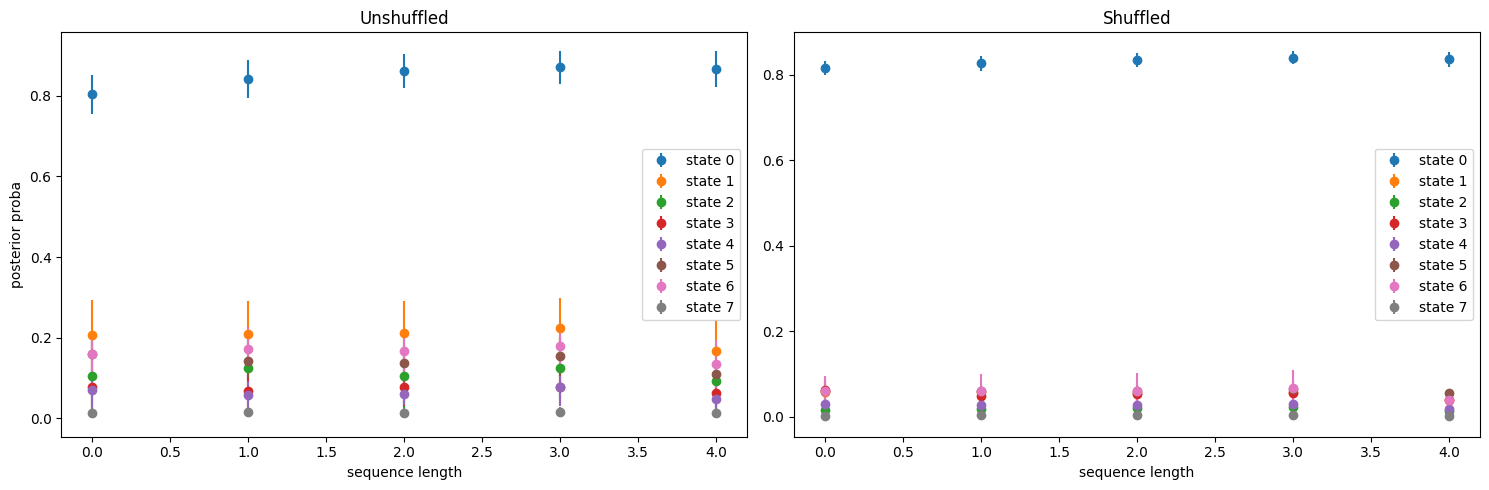

In [ ]:
retake_probas = {}
retake_probas_shuffled = {}
most_frequent = np.unique(X)
# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 5
averaging_num = 10

for mf in tqdm(most_frequent):
    retake_probas[mf] = []
    retake_probas_shuffled[mf] = []
    for i in range(averaging_num):
        model_wrapper.fit_model(num_reruns = 1)
        shuffled_wrapper.fit_model(num_reruns = 1)
        retake_probas[mf].append(model_wrapper.predict_distr_for_all(np.array([mf]*length),
                                                                     uniform_initial = True)[mf,:])
        retake_probas_shuffled[mf].append(shuffled_wrapper.predict_distr_for_all(np.array([mf]*length),
                                                                     uniform_initial = True)[mf,:])
    retake_probas[mf] = np.array(retake_probas[mf]).mean(axis = 0), np.array(retake_probas[mf]).std(axis = 0)
    retake_probas_shuffled[mf] = np.array(retake_probas_shuffled[mf]).mean(axis = 0), np.array(retake_probas_shuffled[mf]).std(axis = 0)
    clear_output(wait = True)

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

print()
for mf in most_frequent:
    print(len(retake_probas[mf]),retake_probas[mf][0].shape)
    ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

## Same for model without zeros

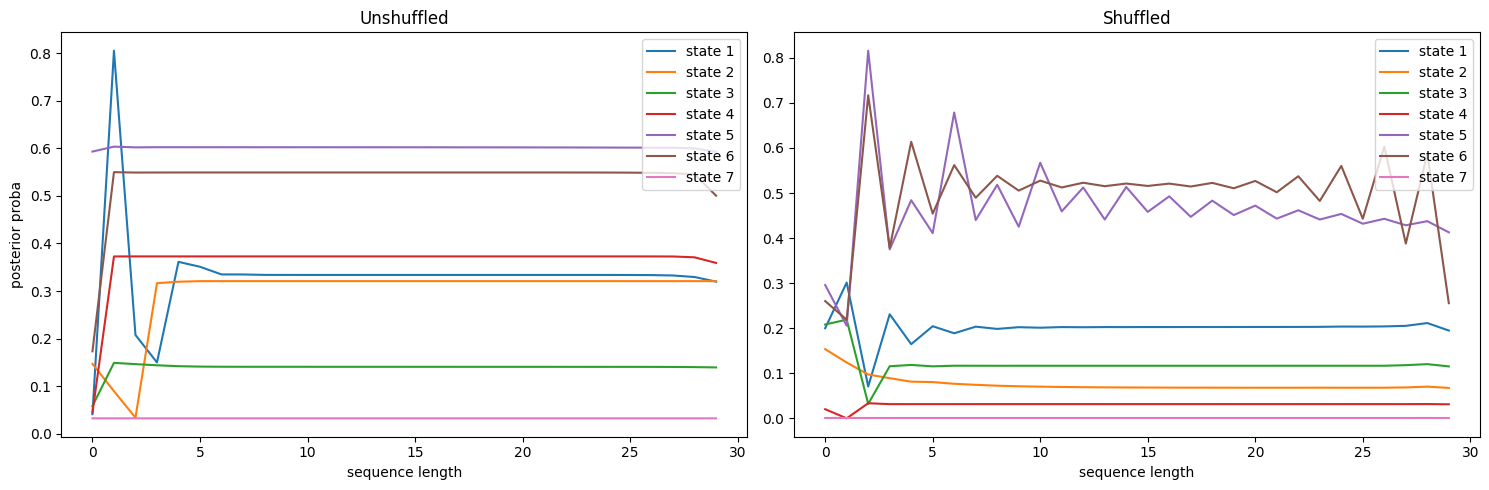

In [ ]:
retake_probas_nz = {}
retake_probas_shuffled_nz = {}
most_frequent = np.unique(X_nz)
length = 30
for mf in most_frequent:
    retake_probas_nz[mf] = model_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[mf,:]
    retake_probas_shuffled_nz[mf] = shuffled_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_nz[mf])), retake_probas_nz[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_nz[mf])), retake_probas_shuffled_nz[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

## Same for model without zeros and initial probabilities are set to uniform

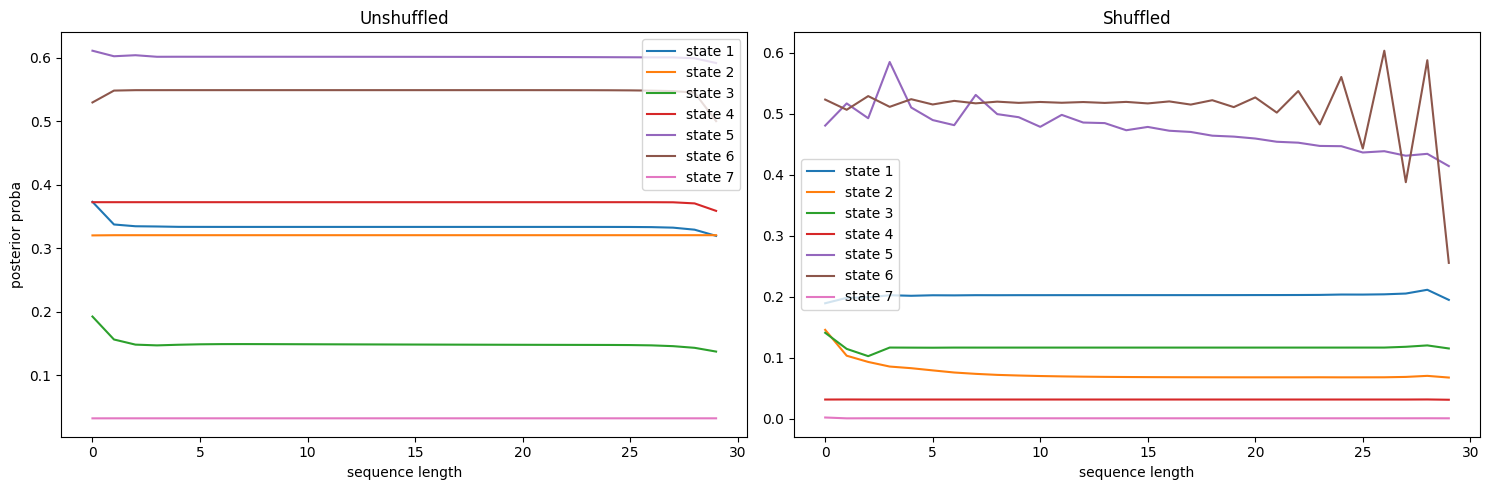

In [ ]:
retake_probas_nz_u = {}
retake_probas_shuffled_nz_u = {}
most_frequent = np.unique(X_nz)
length = 30
for mf in most_frequent:
    retake_probas_nz_u[mf] = model_wrapper_nz.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]
    retake_probas_shuffled_nz_u[mf] = shuffled_wrapper_nz.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_nz_u[mf])), retake_probas_nz_u[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_nz_u[mf])), retake_probas_shuffled_nz_u[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

## **Same for locked emission accounting for frequencies**

#training with zeros

Unshuffled score:  -0.58718360309839 +- 0.005567626116950957
Shuffled score:  -0.6427571221684764 +- 0.0023576643687635264


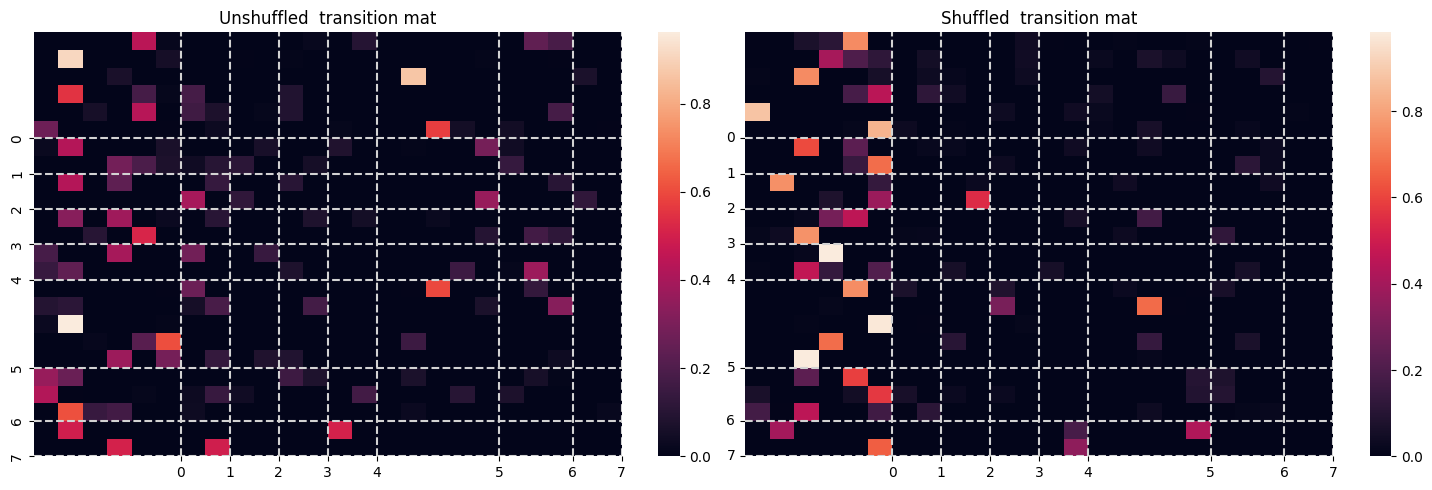

In [ ]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X.reshape(-1, 140), axis = 1).flatten()

model_wrapper_lock = ModelWrap(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

shuffled_wrapper_lock = ModelWrap(
    X_shuffled,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

model_wrapper_lock.fit_model(
    account_frequencies = True,
    num_reruns = 50
)
shuffled_wrapper_lock.fit_model(
    account_frequencies = True,
    num_reruns = 50
)

clear_output(wait = True)
print("Unshuffled score: ", f"{model_wrapper_lock.scores['score'].mean()} +- {model_wrapper_lock.scores['score'].std()}")
print("Shuffled score: ", f"{shuffled_wrapper_lock.scores['score'].mean()} +- {shuffled_wrapper_lock.scores['score'].std()}")

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))
model_wrapper_lock.draw_heatmap('transition', ax = ax[0], add_title= 'Unshuffled ')
shuffled_wrapper_lock.draw_heatmap('transition', ax = ax[1], add_title= 'Shuffled ')

#training without zeros

Unshuffled score:  -1.2619652488406372 +- 0.013526483844811586
Shuffled score:  -1.2931267178587675 +- 0.01486243405309702


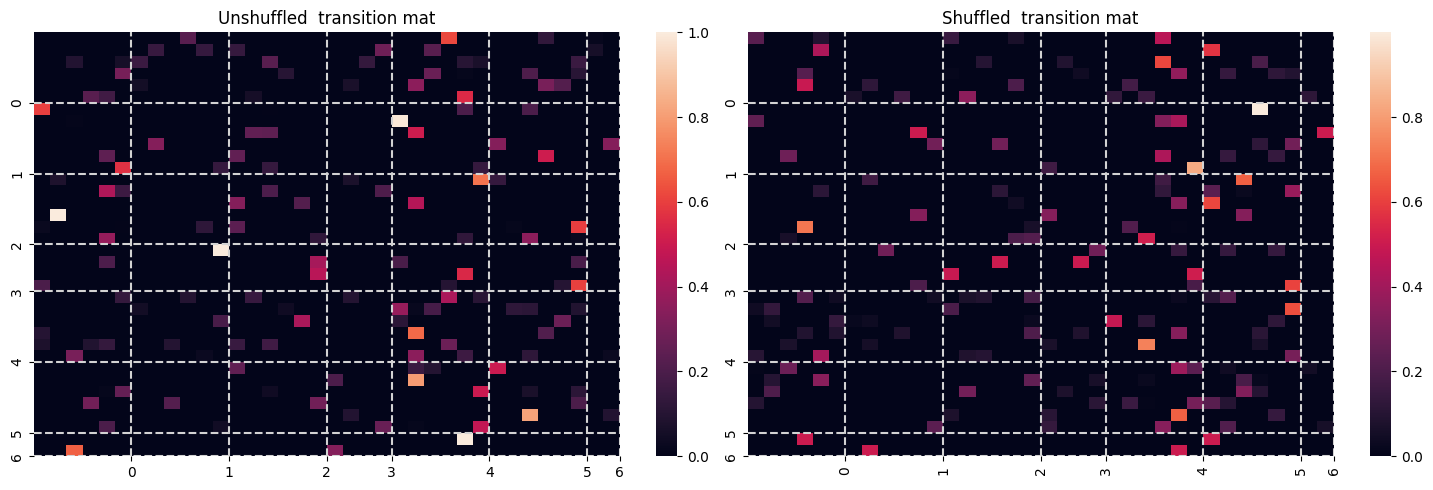

In [ ]:
rng = np.random.default_rng()
X_shuffled = rng.permuted(X.reshape(-1, 140), axis = 1).flatten()

X_nz = X[X>0]
lengths_nz = [len(x[x>0]) for x in X.reshape(-1, 140)]

X_nz_shuffled = X_shuffled[X_shuffled>0]
lengths_nz_shuffled = [len(x[x>0]) for x in X_shuffled.reshape(-1, 140)]

model_wrapper_lock_nz = ModelWrap(
    X_nz-1,
    lengths = lengths_nz
)
print(np.unique(X_nz-1))

shuffled_wrapper_lock_nz = ModelWrap(
    X_nz_shuffled-1,
    lengths = lengths_nz
)

model_wrapper_lock_nz.fit_model(
    account_frequencies = True
)
shuffled_wrapper_lock_nz.fit_model(
    account_frequencies = True
)

clear_output(wait = True)
print("Unshuffled score: ", f"{model_wrapper_lock_nz.scores['score'].mean()} +- {model_wrapper_lock_nz.scores['score'].std()}")
print("Shuffled score: ", f"{shuffled_wrapper_lock_nz.scores['score'].mean()} +- {shuffled_wrapper_lock_nz.scores['score'].std()}")

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))
model_wrapper_lock_nz.draw_heatmap('transition', ax = ax[0], add_title= 'Unshuffled ')
shuffled_wrapper_lock_nz.draw_heatmap('transition', ax = ax[1], add_title= 'Shuffled ')

## Probabilities for predicting the same color

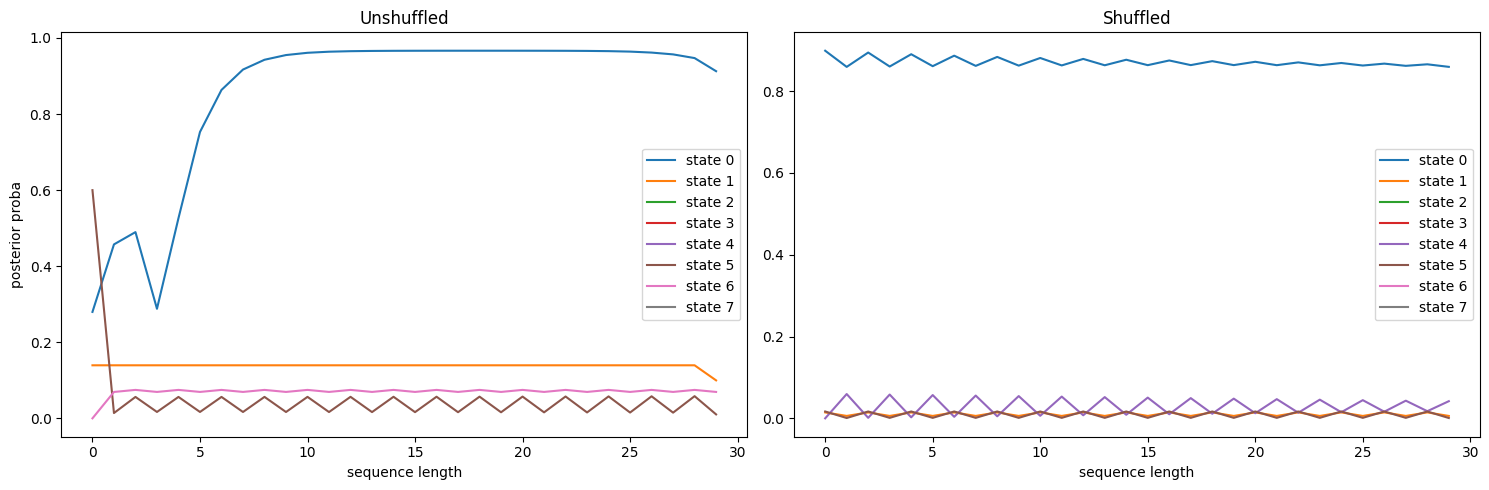

In [ ]:
retake_probas_l = {}
retake_probas_shuffled_l = {}
most_frequent = np.unique(X)
length = 30
for mf in most_frequent:
    retake_probas_l[mf] = model_wrapper_lock.predict_distr_for_all(np.array([mf]*length))[mf,:]
    retake_probas_shuffled_l[mf] = shuffled_wrapper_lock.predict_distr_for_all(np.array([mf]*length))[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_l[mf])), retake_probas_l[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_l[mf])), retake_probas_shuffled_l[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)
# print(retake_probas_shuffled_l)

## Same but unified start prob

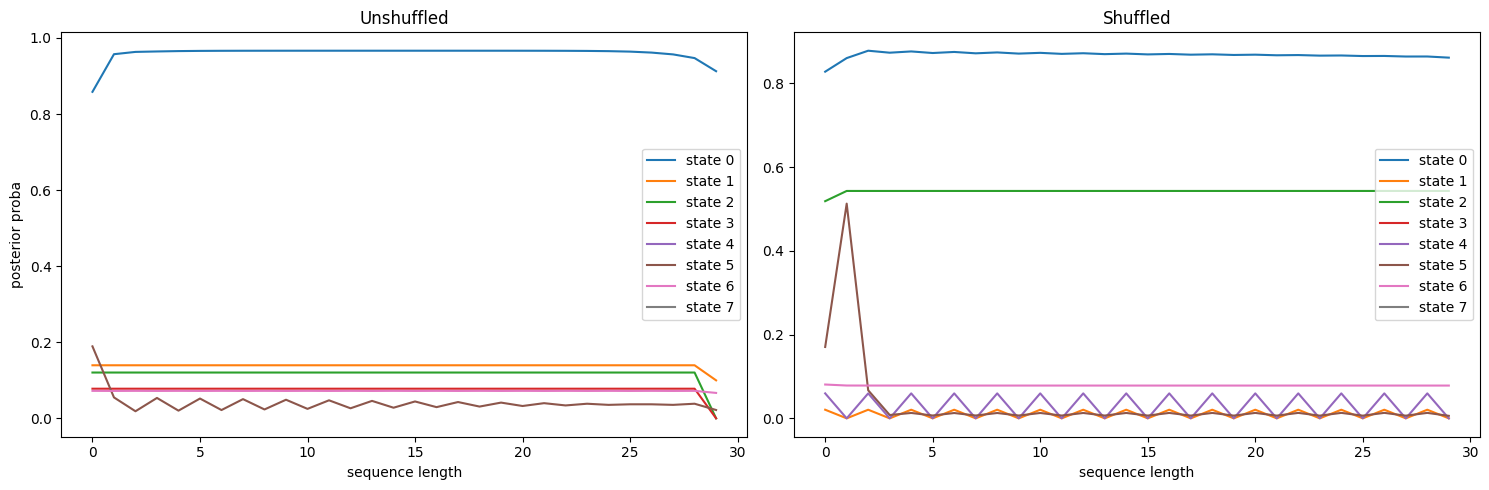

In [ ]:
retake_probas_lu = {}
retake_probas_shuffled_lu = {}
most_frequent = np.unique(X)
length = 30
for mf in most_frequent:
    retake_probas_lu[mf] = model_wrapper_lock.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]
    retake_probas_shuffled_lu[mf] = shuffled_wrapper_lock.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_lu[mf])), retake_probas_lu[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_lu[mf])), retake_probas_shuffled_lu[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

#Same with no zeros

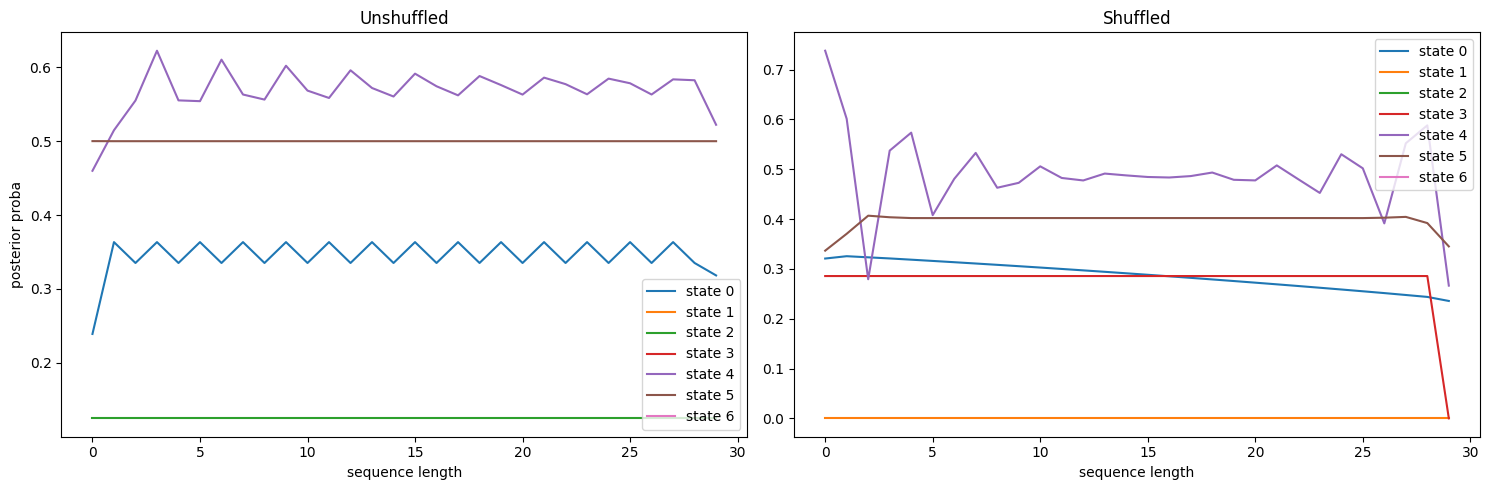

In [ ]:
retake_probas_l_nz = {}
retake_probas_shuffled_l_nz = {}
most_frequent = np.unique(X_nz -1)
length = 30
for mf in most_frequent:
    retake_probas_l_nz[mf] = model_wrapper_lock_nz.predict_distr_for_all(np.array([mf]*length))[mf,:]
    retake_probas_shuffled_l_nz[mf] = shuffled_wrapper_lock_nz.predict_distr_for_all(np.array([mf]*length))[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_l_nz[mf])), retake_probas_l_nz[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_l_nz[mf])), retake_probas_shuffled_l_nz[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

## Same with no zeros and unified start prob

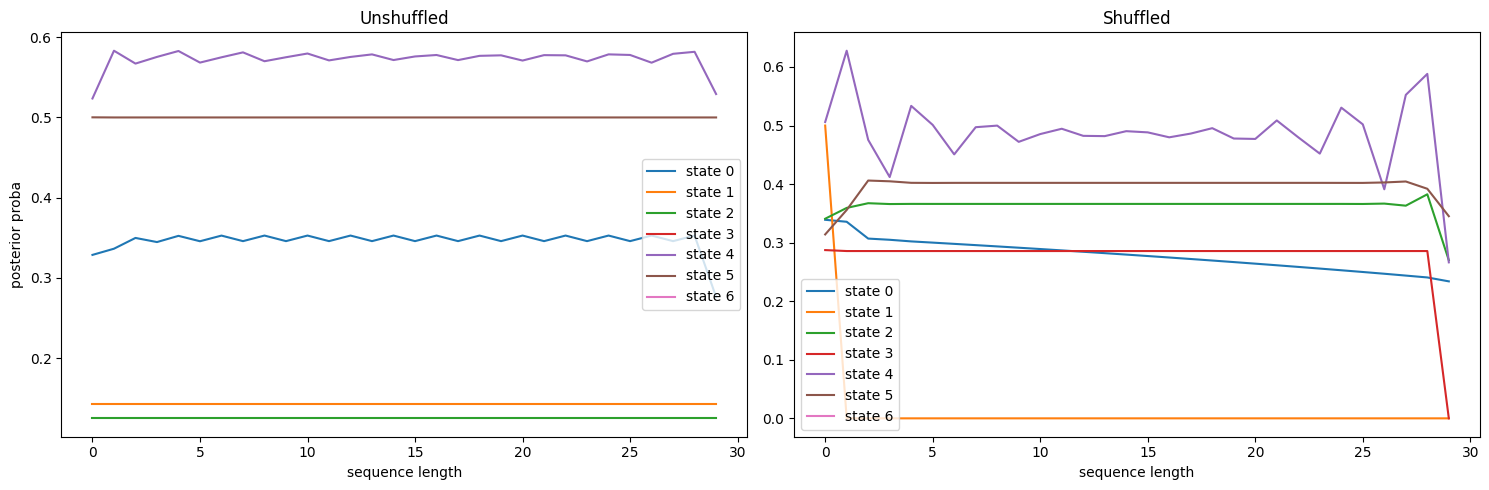

In [ ]:
retake_probas_lu_nz = {}
retake_probas_shuffled_lu_nz = {}
most_frequent = np.unique(X_nz -1)
length = 30
for mf in most_frequent:
    retake_probas_lu_nz[mf] = model_wrapper_lock_nz.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]
    retake_probas_shuffled_lu_nz[mf] = shuffled_wrapper_lock_nz.predict_distr_for_all(np.array([mf]*length), uniform_initial=True)[mf,:]

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].plot(np.arange(len(retake_probas_lu_nz[mf])), retake_probas_lu_nz[mf], label = f'state {mf}')
    ax[1].plot(np.arange(len(retake_probas_shuffled_lu_nz[mf])), retake_probas_shuffled_lu_nz[mf], label = f'state {mf}')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

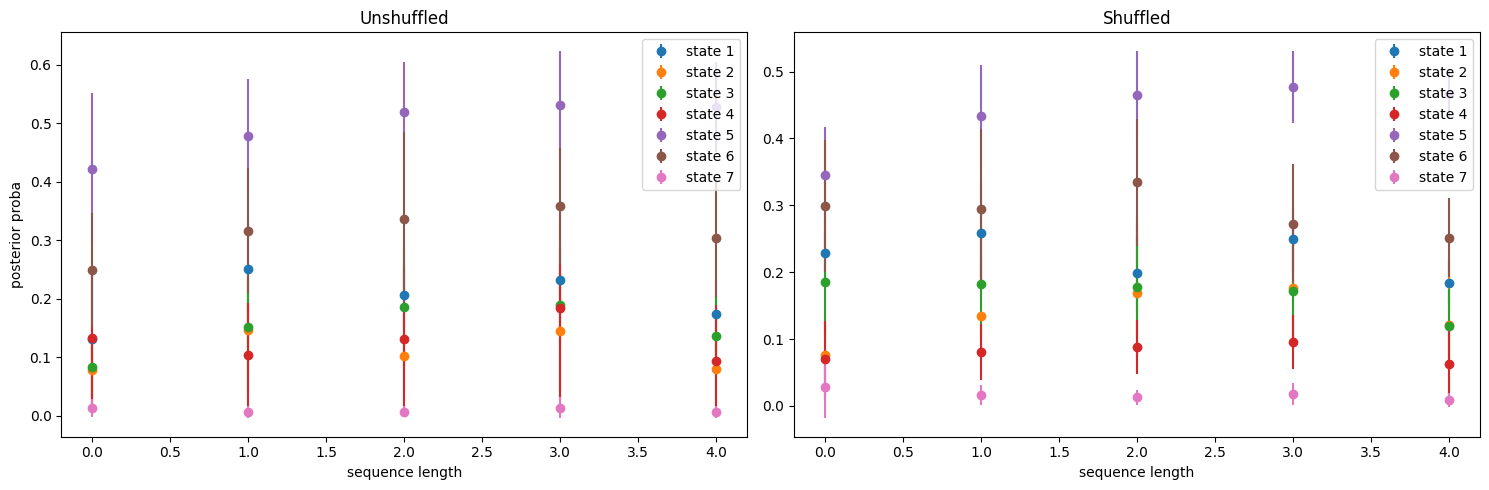

In [ ]:
retake_probas_nz = {}
retake_probas_shuffled_nz = {}
most_frequent = np.unique(X_nz)
# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 5
averaging_num = 20

for mf in tqdm(most_frequent):
    retake_probas_nz[mf] = []
    retake_probas_shuffled_nz[mf] = []
    for i in range(averaging_num):
        model_wrapper_nz.fit_model(num_reruns = 1)
        shuffled_wrapper_nz.fit_model(num_reruns = 1)
        retake_probas_nz[mf].append(model_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[mf,:])
        retake_probas_shuffled_nz[mf].append(shuffled_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[mf,:])
    retake_probas_nz[mf] = np.array(retake_probas_nz[mf]).mean(axis = 0), np.array(retake_probas_nz[mf]).std(axis = 0)
    retake_probas_shuffled_nz[mf] = np.array(retake_probas_shuffled_nz[mf]).mean(axis = 0), np.array(retake_probas_shuffled_nz[mf]).std(axis = 0)
    clear_output(wait = True)

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

print()
for mf in most_frequent:
    print(len(retake_probas_nz[mf]),retake_probas_nz[mf][0].shape)
    ax[0].errorbar(np.arange(len(retake_probas_nz[mf][0])), retake_probas_nz[mf][0], yerr = retake_probas_nz[mf][1], label = f'state {mf}', fmt = 'o')
    ax[1].errorbar(np.arange(len(retake_probas_shuffled_nz[mf][0])), retake_probas_shuffled_nz[mf][0], yerr = retake_probas_shuffled_nz[mf][1], label = f'state {mf}', fmt = 'o')

ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('sequence length')
ax[1].set_xlabel('sequence length')
ax[0].set_ylabel('posterior proba')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

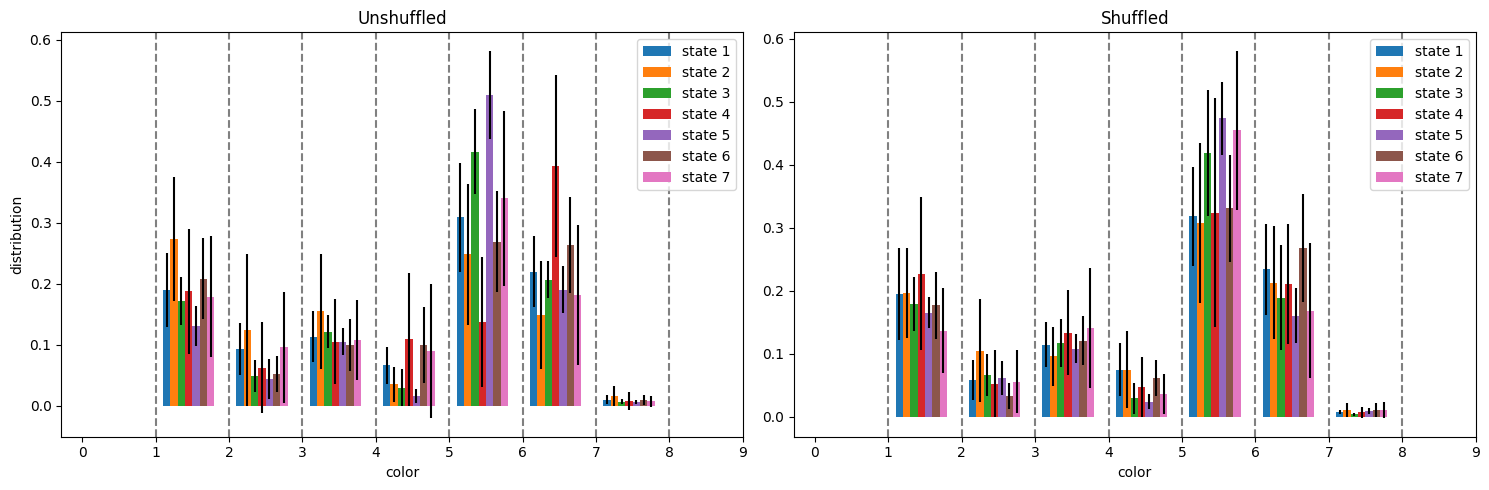

In [ ]:
distr_nz = {}
distr_shuffled_nz = {}
most_frequent = np.unique(X_nz)
# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 5
averaging_num = 25

for mf in tqdm(most_frequent):
    distr_nz[mf] = []
    distr_shuffled_nz[mf] = []
    for i in range(averaging_num):
        model_wrapper_nz.fit_model(num_reruns = 1)
        shuffled_wrapper_nz.fit_model(num_reruns = 1)
        # print(model_wrapper.predict_distr_for_all(np.array([mf]*length)).shape)
        distr_nz[mf].append(model_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[:,-1])
        distr_shuffled_nz[mf].append(shuffled_wrapper_nz.predict_distr_for_all(np.array([mf]*length))[:,-1])
    print(np.array(distr_nz[mf]).shape)
    distr_nz[mf] = np.array(distr_nz[mf]).mean(axis = 0), np.array(distr_nz[mf]).std(axis = 0)
    distr_shuffled_nz[mf] = np.array(distr_shuffled_nz[mf]).mean(axis = 0), np.array(distr_shuffled_nz[mf]).std(axis = 0)
    clear_output(wait = True)

fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].bar(np.arange(len(distr_nz[mf][0]))+0.05+0.1*mf, distr_nz[mf][0], yerr = distr_nz[mf][1], label = f'state {mf}', width = 0.1)
    ax[1].bar(np.arange(len(distr_shuffled_nz[mf][0]))+0.05+0.1*mf, distr_shuffled_nz[mf][0], yerr = distr_shuffled_nz[mf][1], label = f'state {mf}', width = 0.1)
    # print(len(distr[mf]),distr[mf][0].shape)
    # ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    # ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

for mf in range(1,len(most_frequent)+2):
    ax[0].axvline(x = mf, linestyle='--', color='gray')
    ax[1].axvline(x = mf, linestyle='--', color='gray')

ax[0].set_xticks(np.arange(10))
ax[1].set_xticks(np.arange(10))
ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('color')
ax[1].set_xlabel('color')
ax[0].set_ylabel('distribution')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

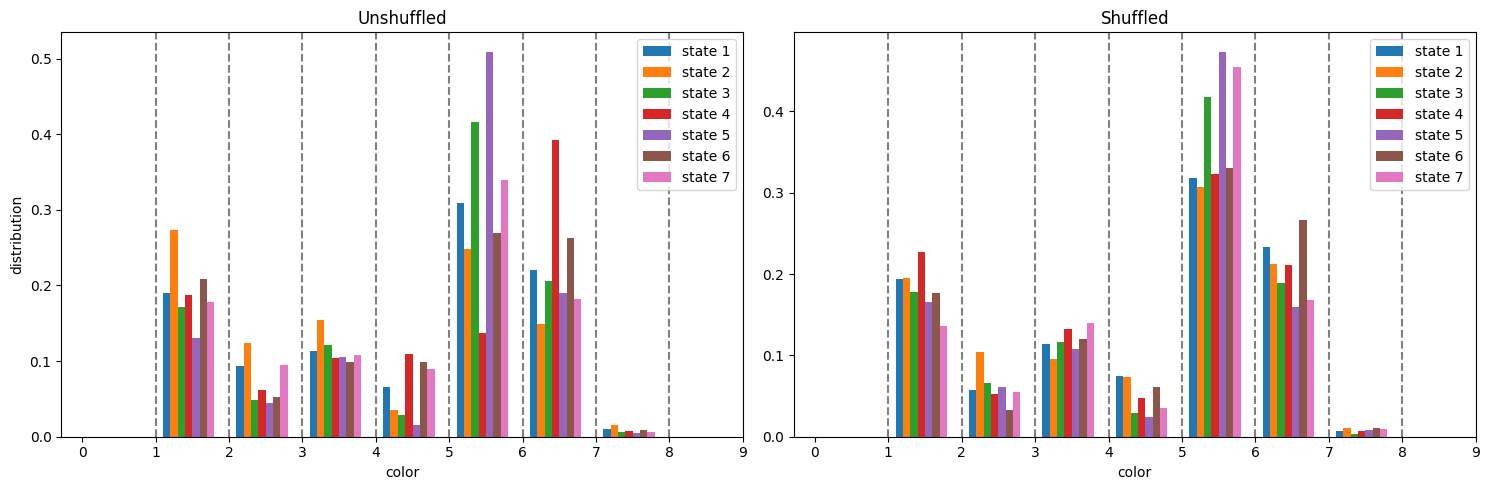

In [ ]:
fig, ax = plt.subplots(1, 2, tight_layout = True, figsize = (15, 5))

for mf in most_frequent:
    ax[0].bar(np.arange(len(distr_nz[mf][0]))+0.05+0.1*mf, distr_nz[mf][0],
              # yerr = distr_nz[mf][1],
              label = f'state {mf}', width = 0.1)
    ax[1].bar(np.arange(len(distr_shuffled_nz[mf][0]))+0.05+0.1*mf, distr_shuffled_nz[mf][0],
              # yerr = distr_shuffled_nz[mf][1],
              label = f'state {mf}', width = 0.1)
    # print(len(distr[mf]),distr[mf][0].shape)
    # ax[0].errorbar(np.arange(len(retake_probas[mf][0])), retake_probas[mf][0], yerr = retake_probas[mf][1], label = f'state {mf}', fmt = 'o')
    # ax[1].errorbar(np.arange(len(retake_probas_shuffled[mf][0])), retake_probas_shuffled[mf][0], yerr = retake_probas_shuffled[mf][1], label = f'state {mf}', fmt = 'o')

for mf in range(1,len(most_frequent)+2):
    ax[0].axvline(x = mf, linestyle='--', color='gray')
    ax[1].axvline(x = mf, linestyle='--', color='gray')

ax[0].set_xticks(np.arange(10))
ax[1].set_xticks(np.arange(10))
ax[0].set_title('Unshuffled')
ax[1].set_title('Shuffled')
ax[0].set_xlabel('color')
ax[1].set_xlabel('color')
ax[0].set_ylabel('distribution')
ax[0].legend()
ax[1].legend()

clear_output(wait = True)

#locked emission

you can't set the n_components if lock_emission is checked True
setting n_components to None


100%|██████████| 3/3 [00:09<00:00,  3.15s/it]


True


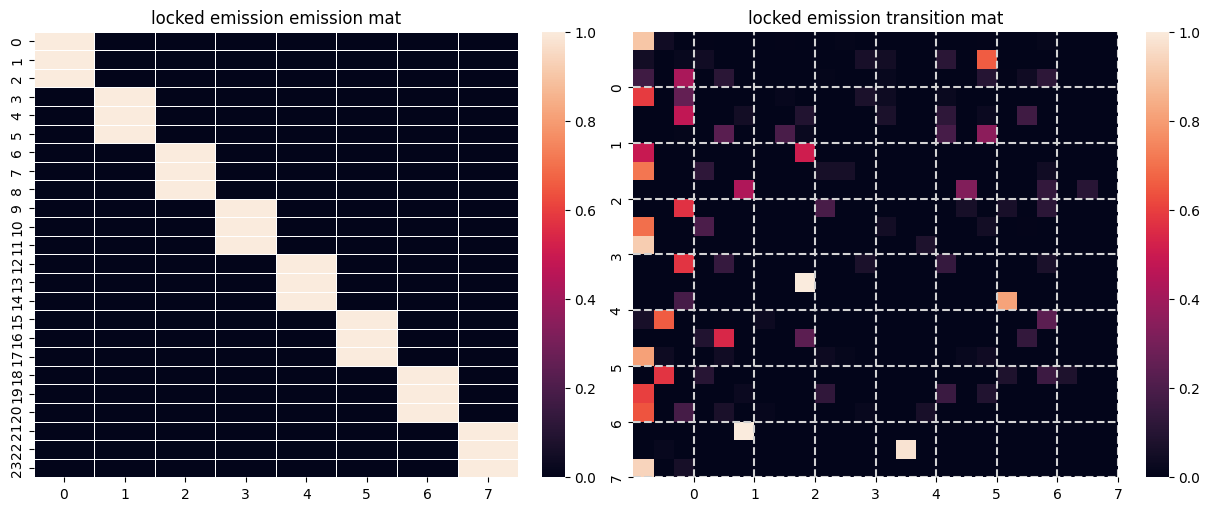

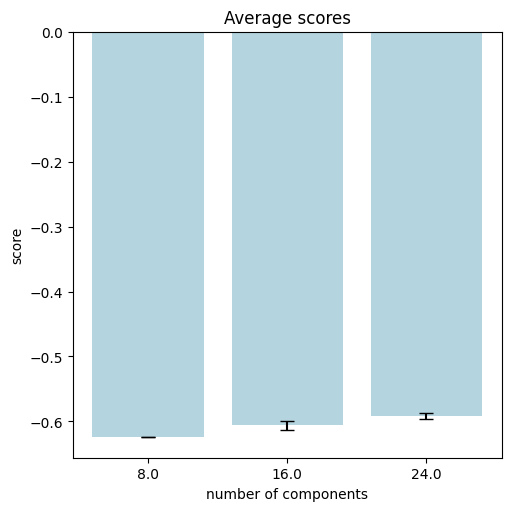

In [ ]:
#tests for ModelWrap

locked_emission_wrapper = ModelWrap(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

locked_emission_wrapper.fit_model(
    lock_emission = True
)

fig, ax = plt.subplots(1,2, figsize = (12,5), constrained_layout = True)
locked_emission_wrapper.draw_heatmap('emission', ax = ax[0], add_title = 'locked emission')
locked_emission_wrapper.draw_heatmap('transition', ax = ax[1], add_title = 'locked emission')

# display(basic_model_wrapper.scores)
fig_bar,ax_bar = plt.subplots(figsize = (5,5), constrained_layout = True)
locked_emission_wrapper.bar_scores(ax_bar)

print(locked_emission_wrapper.model.monitor_.converged)
# print(locked_emission_wrapper.predict_next_dist(np.array([1,1,1, 1,1, 1, 1, 1, 1, 1])))
# np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=3, suppress=True, threshold=1000, formatter=None)
# next_step_probas = [locked_emission_wrapper.predict_next_dist(np.ones(i, dtype='int64')) for i in range(1,11)]

# for next_step_proba in next_step_probas:
#     print(next_step_proba)

[(0, 2497), (1, 83), (2, 28), (3, 50), (4, 20), (5, 165), (6, 93), (7, 4)]


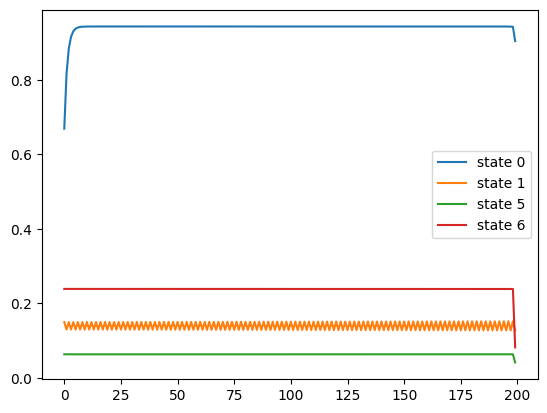

In [ ]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=3, suppress=True, threshold=1000, formatter=None)

# most_frequent = np.unique(X.reshape(-1, 140)[:,0])
# distr_seq = locked_emission_wrapper.next_is_same_proba(most_frequent,num_points=20)
retake_probas = {}
most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 200
for mf in most_frequent:
    retake_probas[mf] = locked_emission_wrapper.predict_distr_for_all(np.array([mf]*length))[mf,:]

for k, v in retake_probas.items():
    plt.plot(np.arange(len(v)), v, label = f'state {k}')

plt.legend()



frequencies = OrderedDict(sorted(Counter(X).items()))
print([(k, frequencies[k]) for k in range(8)])

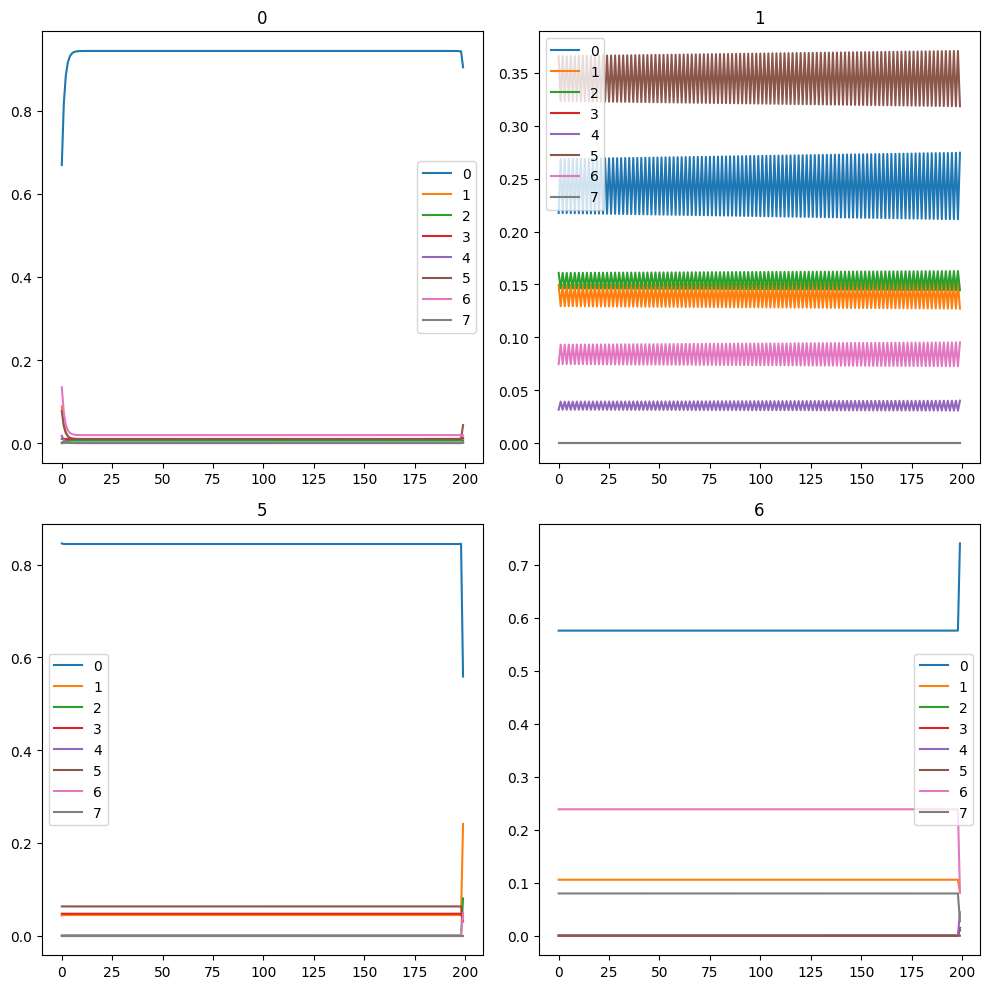

In [ ]:
distributions = {}
most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 200
for mf in most_frequent:
    distributions[mf] = locked_emission_wrapper.predict_distr_for_all(np.array([mf]*length))

fig, ax = plt.subplots(2,2,tight_layout=True, figsize = (10,10))

for i, mf in enumerate(most_frequent):
    for j, raw in enumerate(distributions[mf]):
        ax[i//2%2, i%2].plot(np.arange(len(raw)), raw, label = f'{j}')
    ax[i//2%2, i%2].set_title(f'{mf}')
    ax[i//2%2, i%2].legend()

#locked emissions number of states assigned according to frequency

account_frequencies is set to True
setting lock_emission to True
you can't set the n_components if lock_emission is checked True
setting n_components to None


100%|██████████| 1/1 [00:06<00:00,  6.72s/it]


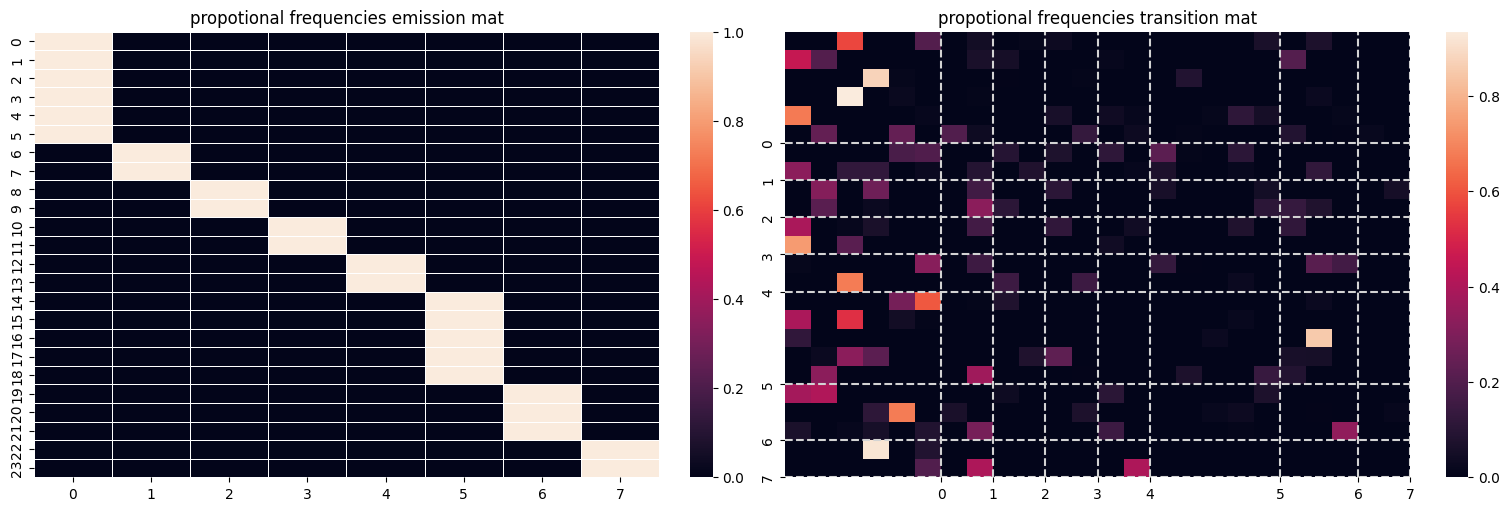

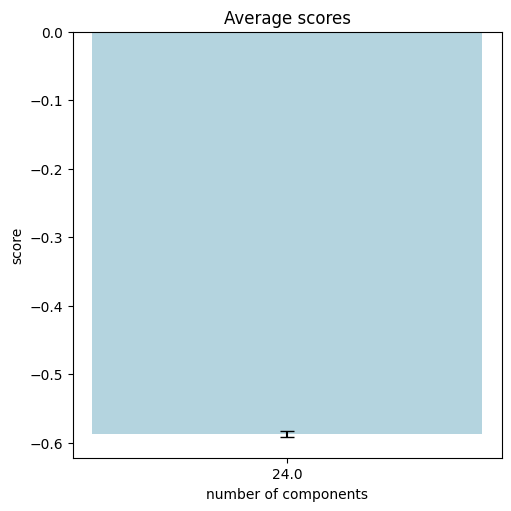

In [ ]:
freq_emission_wrapper = ModelWrap(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

freq_emission_wrapper.fit_model(
    account_frequencies = True
)

fig, ax = plt.subplots(1,2, figsize = (15,5), constrained_layout = True)
freq_emission_wrapper.draw_heatmap('emission', ax = ax[0], add_title = 'propotional frequencies' )
freq_emission_wrapper.draw_heatmap('transition', ax = ax[1], add_title = 'propotional frequencies')

fig_bar,ax_bar = plt.subplots(figsize = (5,5), constrained_layout = True)
freq_emission_wrapper.bar_scores(ax_bar)

[(0, 2497), (1, 83), (2, 28), (3, 50), (4, 20), (5, 165), (6, 93), (7, 4)]


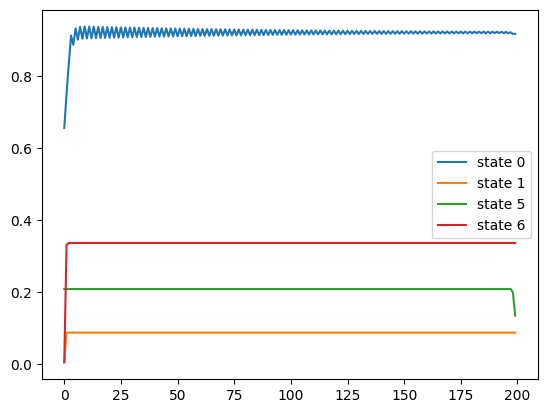

In [ ]:
np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=3, suppress=True, threshold=1000, formatter=None)

retake_probas = {}
most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 200
for mf in most_frequent:
    retake_probas[mf] = freq_emission_wrapper.predict_distr_for_all(np.array([mf]*length))[mf,:]

for k, v in retake_probas.items():
    plt.plot(np.arange(len(v)), v, label = f'state {k}')

plt.legend()



frequencies = OrderedDict(sorted(Counter(X).items()))
print([(k, frequencies[k]) for k in range(8)])

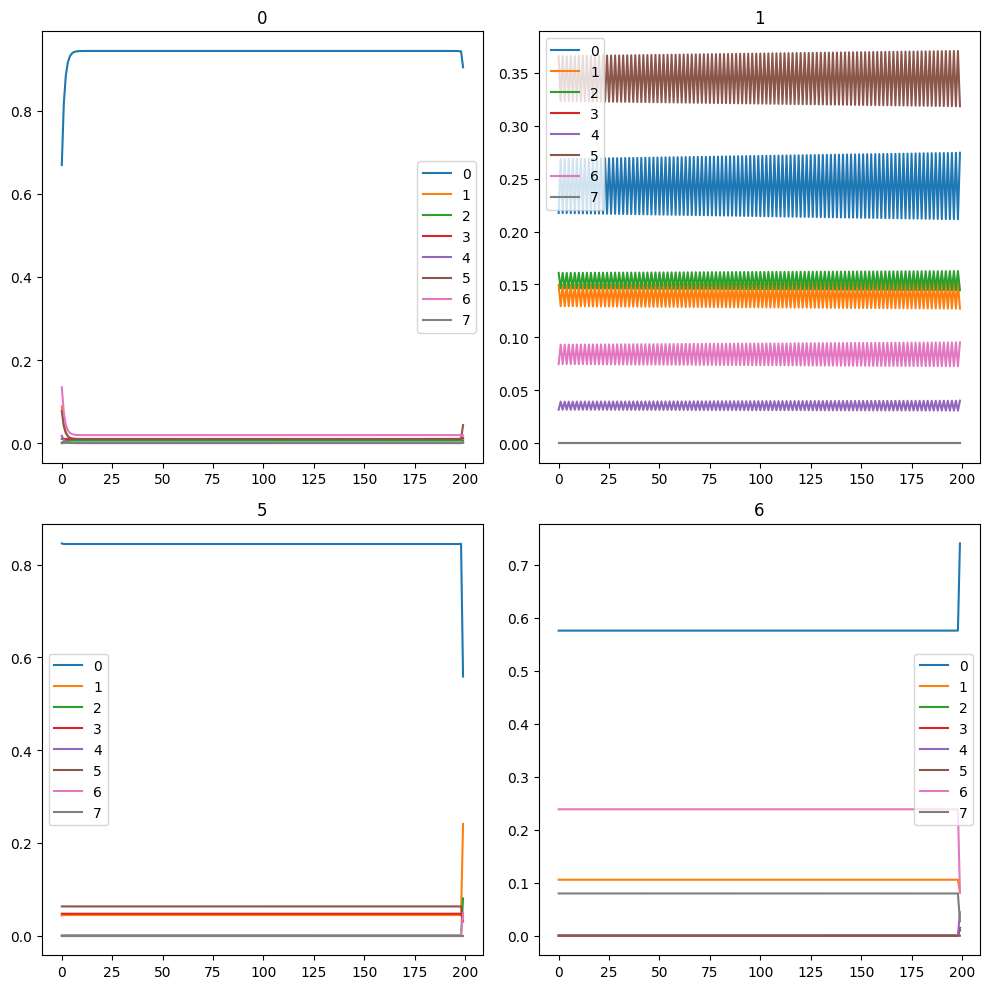

In [ ]:
distributions = {}
most_frequent = np.unique(X.reshape(-1, 140)[:,0])
length = 200
for mf in most_frequent:
    distributions[mf] = locked_emission_wrapper.predict_distr_for_all(np.array([mf]*length))

fig, ax = plt.subplots(2,2,tight_layout=True, figsize = (10,10))

for i, mf in enumerate(most_frequent):
    for j, raw in enumerate(distributions[mf]):
        ax[i//2%2, i%2].plot(np.arange(len(raw)), raw, label = f'{j}')
    ax[i//2%2, i%2].set_title(f'{mf}')
    ax[i//2%2, i%2].legend()

100%|██████████| 3/3 [00:01<00:00,  1.94it/s]


[3.409 1.067 1.256 1.186 3.475 2.491 0.116]
[2.784 0.927 1.496 1.191 4.44  1.961 0.201]
[0.183 0.132 0.191 0.005 0.278 0.213 0.728]


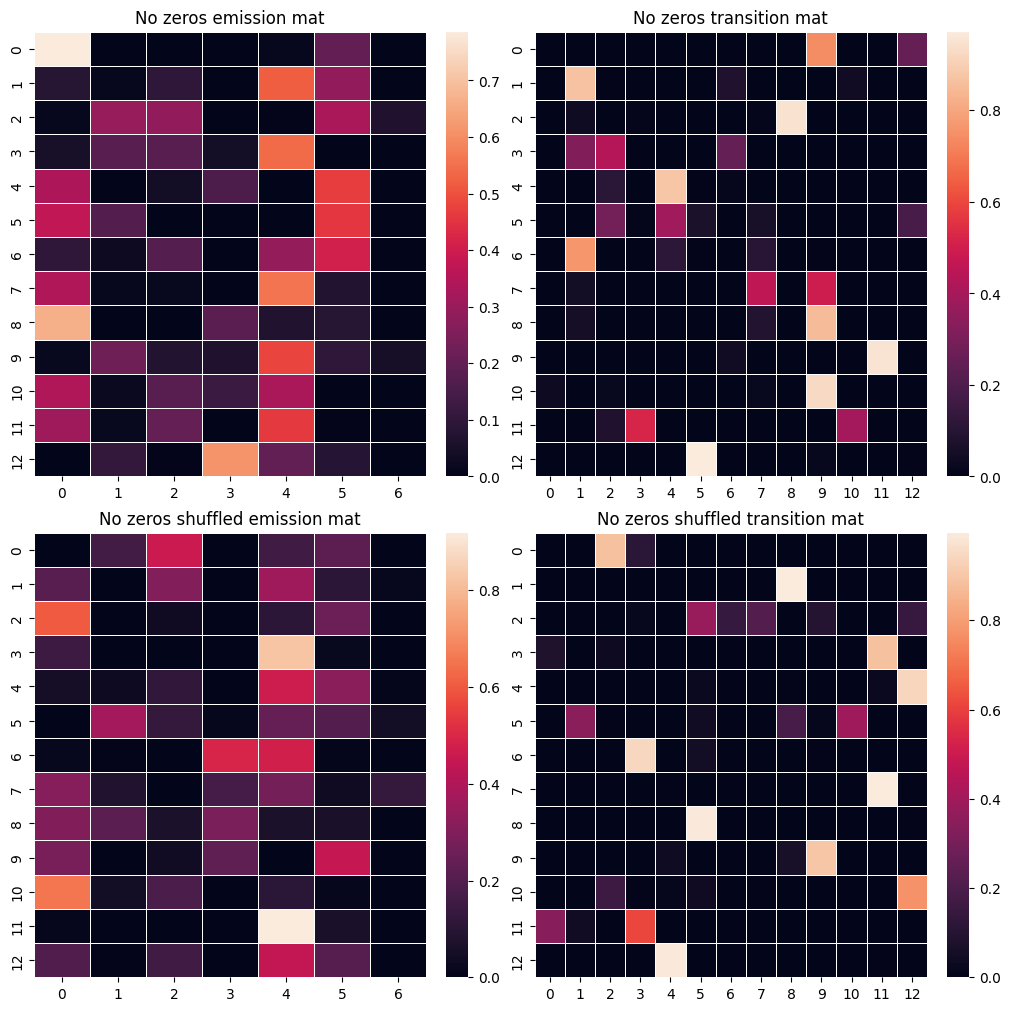

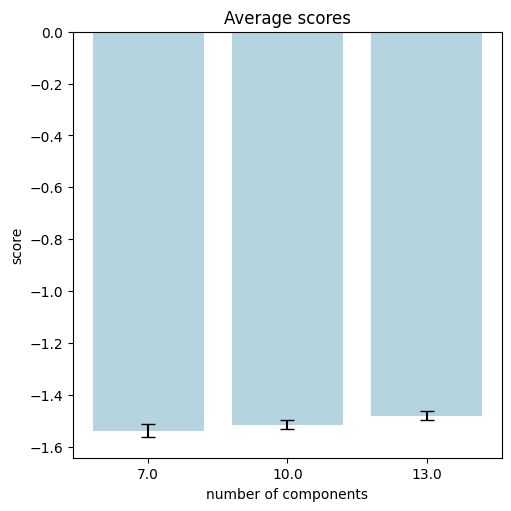

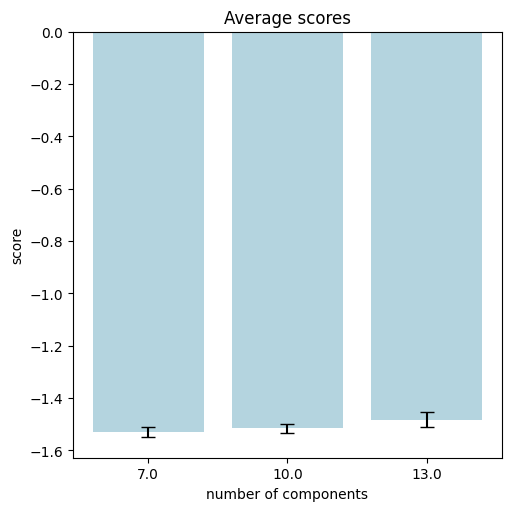

In [ ]:
tmp = X.reshape(-1, 140)
# lengths = (tmp>0).sum(axis = 1).min()
X_no_zeros = []
lengths = []
for raw in tmp:
    X_no_zeros.append(raw[raw>0])
    lengths.append(len(raw[raw>0]))

X_no_zeros = np.array([x for xs in X_no_zeros for x in xs ])-1

no_zeros_wrapper = ModelWrap(
    X_no_zeros,
    lengths = lengths
)
no_zeros_wrapper.fit_model(
    n_components = np.arange(len(np.unique(X_no_zeros)), len(np.unique(X_no_zeros))*2+1, len(np.unique(X_no_zeros))//2),
    # lock_emission = True
)



X_no_zeros_shuffled = []
lengths = []
for raw in tmp:
    np.random.shuffle(raw[raw>0])
    X_no_zeros_shuffled.append(raw[raw>0])
    lengths.append(len(raw[raw>0]))

X_no_zeros_shuffled = np.array([x for xs in X_no_zeros_shuffled for x in xs ])-1

no_zeros_wrapper_shuffled = ModelWrap(
    X_no_zeros,
    lengths = lengths
)
no_zeros_wrapper_shuffled.fit_model(
    n_components = np.arange(len(np.unique(X_no_zeros)), len(np.unique(X_no_zeros))*2+1, len(np.unique(X_no_zeros))//2),
    # lock_emission = True
)


fig, ax = plt.subplots(2,2, figsize = (10,10), constrained_layout = True)
no_zeros_wrapper.draw_heatmap('emission', ax = ax[0, 0], add_title = 'No zeros' )
no_zeros_wrapper.draw_heatmap('transition', ax = ax[0, 1], add_title = 'No zeros')

fig_bar,ax_bar = plt.subplots(figsize = (5,5), constrained_layout = True)
no_zeros_wrapper.bar_scores(ax_bar)

no_zeros_wrapper_shuffled.draw_heatmap('emission', ax = ax[1, 0], add_title = 'No zeros shuffled' )
no_zeros_wrapper_shuffled.draw_heatmap('transition', ax = ax[1, 1], add_title = 'No zeros shuffled')

fig_bar_s,ax_bar_s = plt.subplots(figsize = (5,5), constrained_layout = True)
no_zeros_wrapper_shuffled.bar_scores(ax_bar_s)

print(no_zeros_wrapper.model.emissionprob_.sum(axis = 0))
print(no_zeros_wrapper_shuffled.model.emissionprob_.sum(axis = 0))
print(np.abs(no_zeros_wrapper_shuffled.model.emissionprob_.sum(axis = 0) - no_zeros_wrapper.model.emissionprob_.sum(axis = 0))/no_zeros_wrapper.model.emissionprob_.sum(axis = 0))

#turn bars into linear plots and get them on one plot (score from number of components)
#and same for with zeros shuffled and not shuffled
#


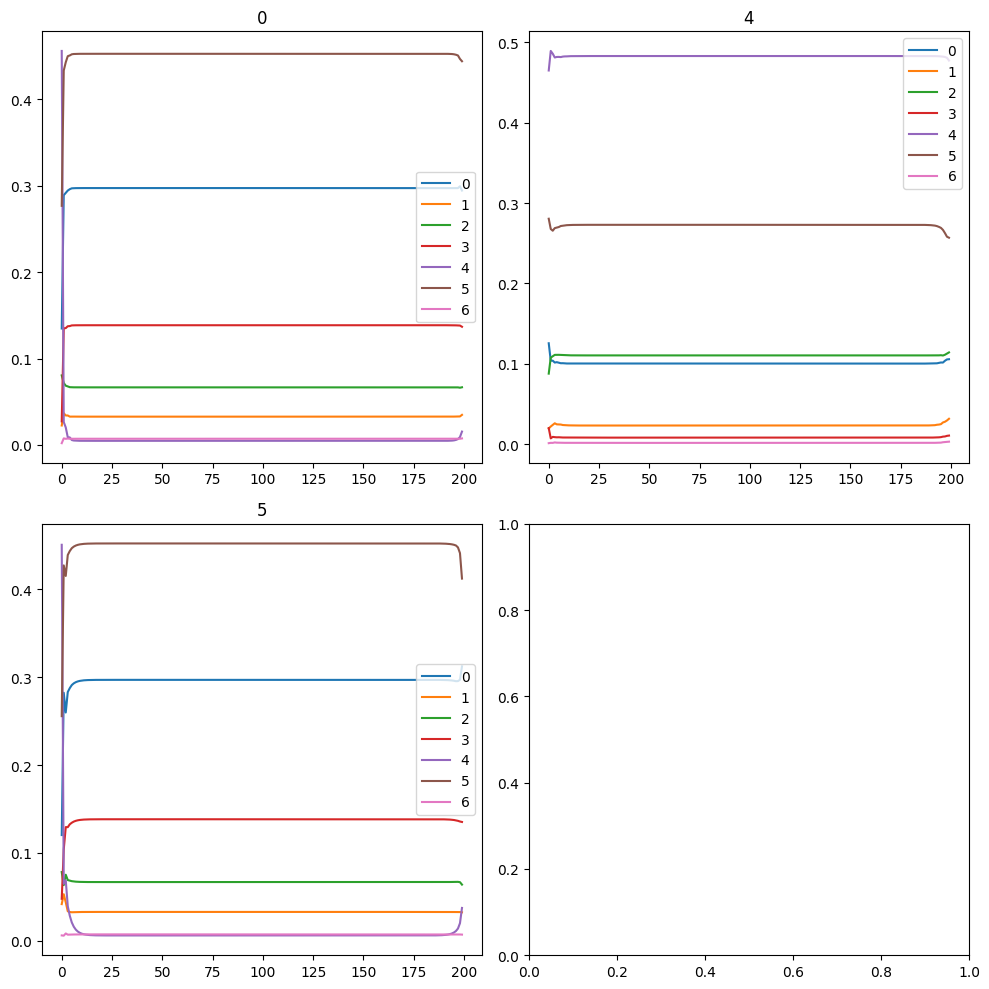

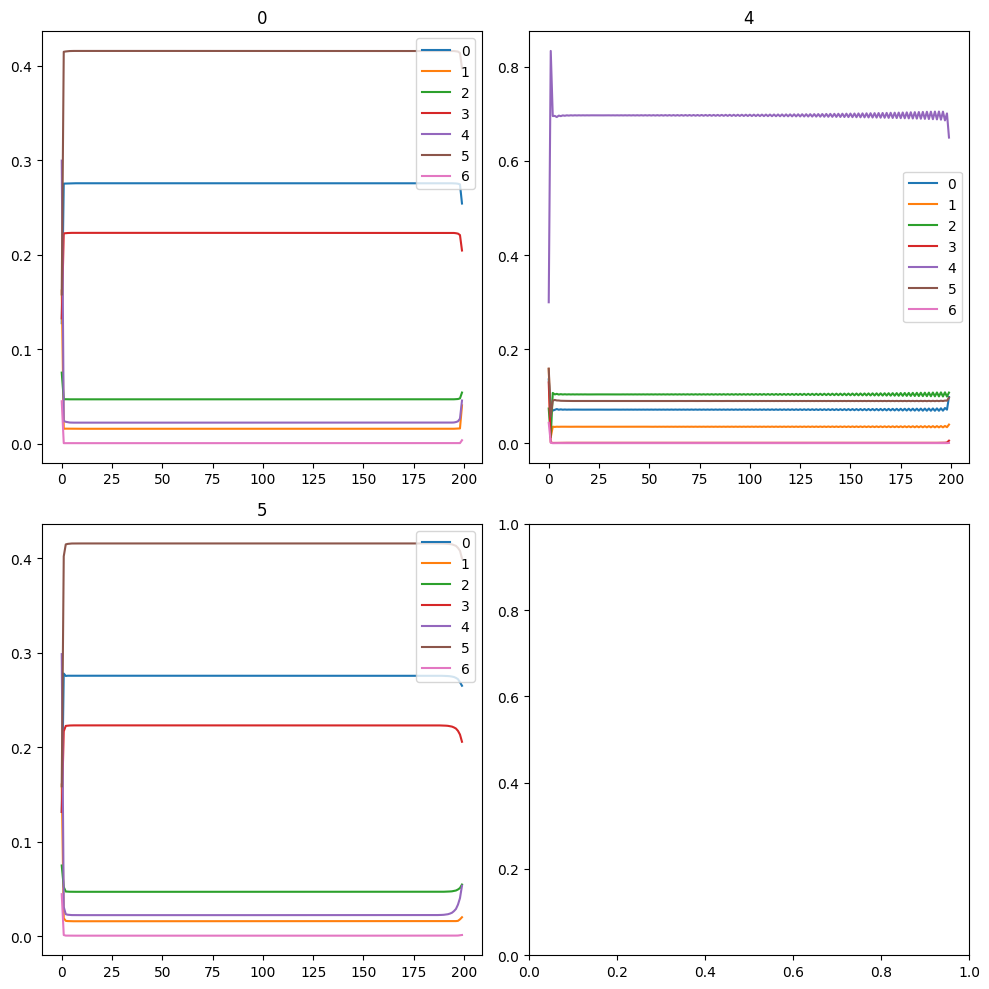

In [ ]:
distributions = {}
most_frequent = np.array([0,4,5])
length = 200
for mf in most_frequent:
    distributions[mf] = no_zeros_wrapper.predict_distr_for_all(np.array([mf]*length))

fig, ax = plt.subplots(2,2,tight_layout=True, figsize = (10,10))

for i, mf in enumerate(most_frequent):
    for j, raw in enumerate(distributions[mf]):
        ax[i//2%2, i%2].plot(np.arange(len(raw)), raw, label = f'{j}')
    ax[i//2%2, i%2].set_title(f'{mf}')
    ax[i//2%2, i%2].legend()

distributions = {}
for mf in most_frequent:
    distributions[mf] = no_zeros_wrapper_shuffled.predict_distr_for_all(np.array([mf]*length))

fig1, ax1 = plt.subplots(2,2,tight_layout=True, figsize = (10,10))

for i, mf in enumerate(most_frequent):
    for j, raw in enumerate(distributions[mf]):
        ax1[i//2%2, i%2].plot(np.arange(len(raw)), raw, label = f'{j}')
    ax1[i//2%2, i%2].set_title(f'{mf}')
    ax1[i//2%2, i%2].legend()

#averaged out predictions

In [ ]:
from IPython.display import clear_output

most_frequent = np.unique(X.reshape(-1, 140)[:,0])
distributions = {mf:[] for mf in most_frequent}

average_num = 30
for i in tqdm(range(average_num)):
    freq_emission_wrapper = ModelWrap(
        X,
        lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
    )

    freq_emission_wrapper.fit_model(
        account_frequencies = True
    )

    length = 20
    for mf in most_frequent:
        distributions[mf].append(locked_emission_wrapper.predict_distr_for_all(np.array([mf]*length)))

    clear_output(wait=True)

means, stds = {}, {}
for mf in most_frequent:
    distributions[mf] = np.array(distributions[mf])
    means[mf], stds[mf] = distributions[mf].mean(axis = 0), distributions[mf].std(axis = 0)
# distributions[mf] = (distributions[mf].mean(axis = 0), distributions[mf].std(axis = 0),)

print(distributions[0][0].shape)
fig, ax = plt.subplots(2,2,tight_layout=True, figsize = (10,10))

for i, mf in enumerate(most_frequent):
    for j in range(len(means[mf])):
        ax[i//2%2, i%2].errorbar(np.arange(len(means[mf][j])), means[mf][j], yerr = stds[mf][j], label = f'{j}', fmt = 'o', ms=1)
    ax[i//2%2, i%2].set_title(f'{mf}')
    ax[i//2%2, i%2].legend()

In [ ]:
# from hmmlearn.hmm import CategoricalHMM
# from tqdm import tqdm

# def get_best_model(
#     X,
#     lengths,
#     model_samples_num = 10,
#     n_components = None,
#     loc_emission = False,
#     ):
#     '''
#     X: array-like flattened chain array
#     lengths: array of lengths of chains
#     model_samples_num = 10: nomber of times we refit the model with data
#     n_components = None: array of number of components of the model
#     loc_emission: boolean if checked True we set the emission matrix
#     ___________
#     returns:
#     best_model: hmmlearn.hmm.CategoricalHMM -- model with the highest score
#     model_scores: pandas.Dataframe -- dateset with scores of all models created
#     '''
#     n_possible_obs = len(np.unique(X))
#     nc = n_components if n_components is not None else np.arange(n_possible_obs, n_possible_obs*3, n_possible_obs)
#     best_score = best_model = None

#     model_scores = {
#         'idx': [],
#         'n_comp': [],
#         'score': [],
#         }
#     model_scores = pd.DataFrame(model_scores).set_index('idx')

#     for n in tqdm(nc):
#         rs = np.random.randint(low = 0, high = 100, size=model_samples_num)
#         for r in rs:
#             if loc_emission:
#                 model = CategoricalHMM(
#                 n_components=n,
#                 random_state=r,
#                 init_params='st',
#                 )
#                 emprob = np.zeros((n,n_possible_obs))
#                 diag = np.array([[i]*(n//n_possible_obs) for i in range(n_possible_obs)]).flatten()
#                 for i in range(len(diag)):
#                     emprob[i, diag[i]] = 1


#                 # for j in range(n//n_possible_obs+1):
#                 #       for i in range(min(n_possible_obs, n-n_possible_obs*j)):
#                 #           emprob[n_possible_obs*j+i, i]=1
#                 model.emissionprob_ = emprob
#             else:
#                 model = CategoricalHMM(
#                 n_components=n,
#                 random_state=r,
#                 )

#             model.fit(
#                 X.reshape(-1,1),
#                 lengths = lengths
#                 )
#             score = model.score(X.reshape(-1,1), lengths=lengths)
#             model_scores.loc[len(model_scores)+1] = [n, score]
#             # print(f'Model n_comp #{n}\t random_state #{r}\tScore: {score}')
#             if best_score is None or score > best_score:
#                 best_model = model
#                 best_score = score

#     return best_model, pd.concat([model_scores.groupby(by = 'n_comp').mean().rename(columns={'score':'mean_score'}), model_scores.groupby(by = 'n_comp').std().rename(columns={'score':'std_score'})], axis = 1)


# def draw_maxtrix_hitmap(model, )


# Fitting the model on the presented data

Practically, shuffling the sequence slightly worsens the score of the model, but the model still inclines towards observation of zero whatever is the hidden state. The matrix that primarily uses randomly generated sequences provides with a matrix where all of the observations are equally possible.

Shuffled marix seems to be inclined to predict 0 as an observation possibly due to the a higher frequency of zeroes in general and lack of any other kind of order


100%|██████████| 4/4 [00:24<00:00,  6.14s/it]


CategoricalHMM(n_components=25, n_features=10,
               random_state=RandomState(MT19937) at 0x7E013D519040)


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

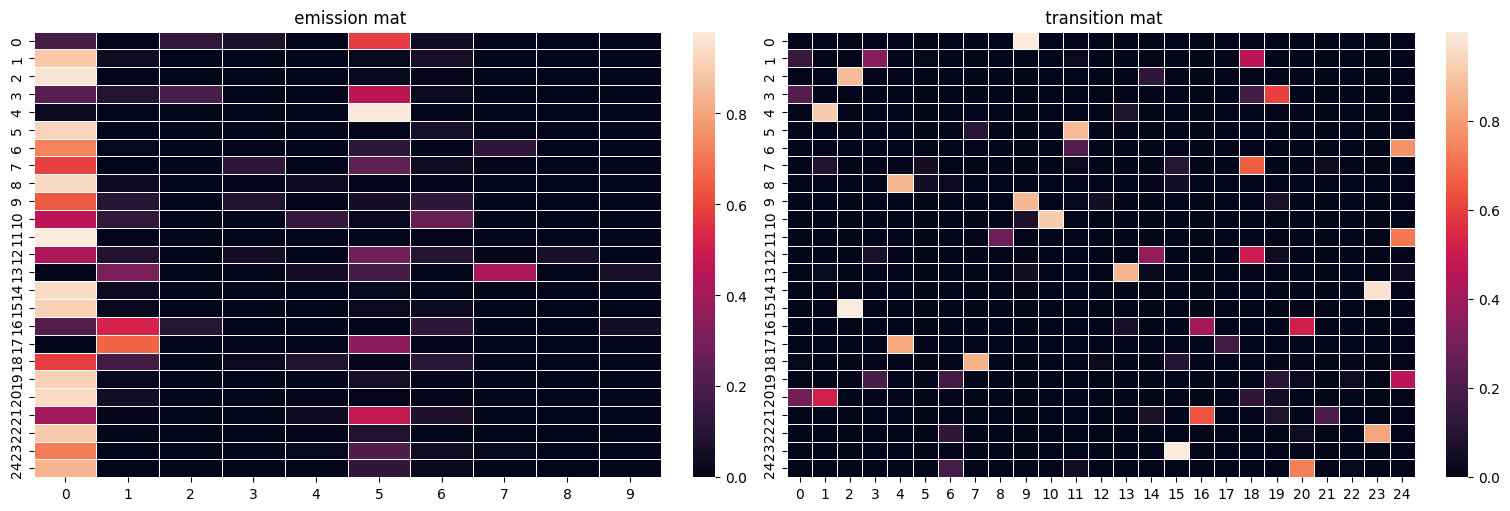

In [ ]:
# best_model, average_model_scores = get_best_model(
#     X,
#     lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
#     model_samples_num = 25,
#     # n_components = np.arange(10, 30, 5)
#     loc_emission=True
# )

basic_model_wrapper = ModelWrap(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
)

basic_model_wrapper.fit_model()

fig, ax = plt.subplots(1,2, figsize = (15,5), constrained_layout = True)
basic_model_wrapper.draw_heatmap('emission', ax = ax[0])
basic_model_wrapper.draw_heatmap('transition', ax = ax[1])

display(basic_model_wrapper.scores)

,mean_score,std_score
n_comp,,
10.0,-1849.389934,4.092463e-12
20.0,-1791.041466,1.746252e+01


<Axes: >

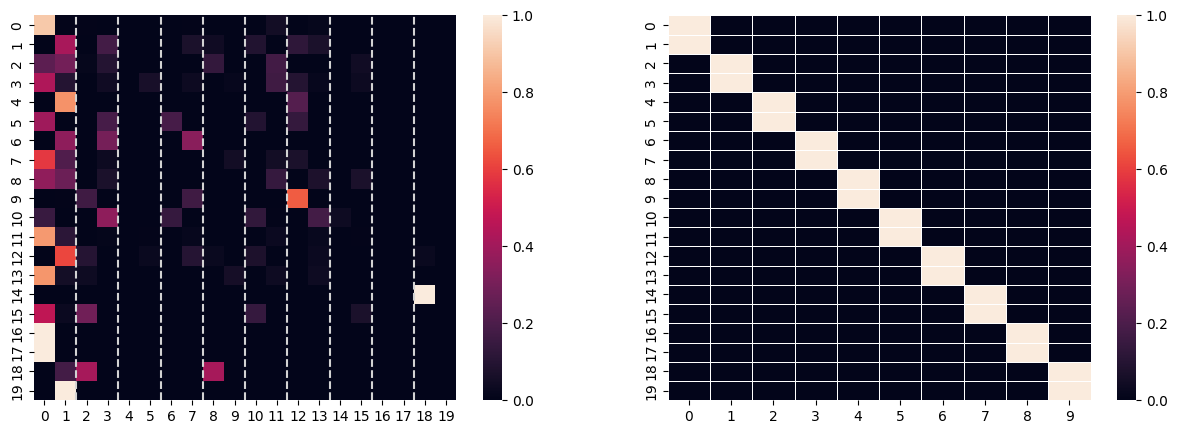

In [ ]:
# pd.concat([model_scores.groupby(by = 'n_comp').mean().rename(columns={'score':'mean_score'}), model_scores.groupby(by = 'n_comp').std().rename(columns={'score':'std_score'})], axis = 1)
display(average_model_scores)
fig, ax = plt.subplots(1,2, figsize = (15,5))

sns.heatmap(best_model.transmat_, ax = ax[0])
for i in np.arange(2, 20, 2):
    ax[0].axvline(x=i, linestyle='--', color='lightgray')

sns.heatmap(best_model.emissionprob_,linewidths=0.5, linecolor='white', ax = ax[1])

,mean_score,std_score
n_comp,,
10.0,-1803.207497,46.297226
15.0,-1797.804353,42.862684
20.0,-1747.191238,28.843872
25.0,-1751.257281,38.121654


,mean_score,std_score,number_components
idx,,,
0,-1803.207497,46.297226,10.0
1,-1797.804353,42.862684,15.0
2,-1747.191238,28.843872,20.0
3,-1751.257281,38.121654,25.0


0
1
2
3


<ipython-input-158-fac7e3888ac0>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='number_components', y='mean_score', data=df, color='lightblue', ci=None)


<Figure size 800x600 with 0 Axes>

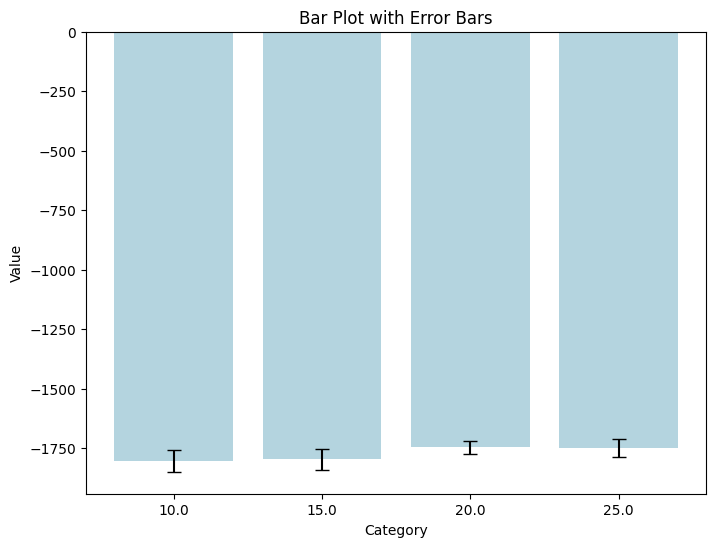

In [ ]:
# sns.barplot(average_model_scores['mean_score'], )
df = pd.concat([basic_model_wrapper.scores.groupby(by = 'n_comp').mean().rename(columns={'score':'mean_score'}), basic_model_wrapper.scores.groupby(by = 'n_comp').std().rename(columns={'score':'std_score'})], axis = 1)

plt.figure(figsize=(8, 6))
# sns.barplot(x='n_comp', y='mean_score', data=df, yerr=df['std_score'], capsize=0.2)
df['number_components'] = df.index
df['idx'] = np.arange(len(df))
df.set_index('idx', inplace=True)
# Example DataFrame
# data = {
#     'Category': ['A', 'B', 'C'],
#     'Value': [10, 15, 7],
#     'Error': [1.5, 2, 1]
# }
# df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))

# Create bar plot
barplot = sns.barplot(x='number_components', y='mean_score', data=df, color='lightblue', ci=None)

# Add error bars
for index, row in df.iterrows():
    plt.errorbar(x=index, y=row['mean_score'], yerr=row['std_score'], fmt='none', color='black', capsize=5)
    print(index)

plt.title('Bar Plot with Error Bars')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

# Arbutrary sequence

In [ ]:
X_rand = np.random.randint(0,10,len(X))

serie_length = 140

best_model_rnd, average_model_rnd_scores = get_best_model(
    X_rand,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
    model_samples_num = 25,
    n_components = np.arange(10, 30, 5)
)
display(average_model_rnd_scores)

100%|██████████| 4/4 [01:05<00:00, 16.36s/it]


,mean_score,std_score
n_comp,,
10.0,-6747.434424,7.126141
15.0,-6733.170658,7.804775
20.0,-6723.901741,9.877225
25.0,-6708.760681,14.423868


<Axes: >

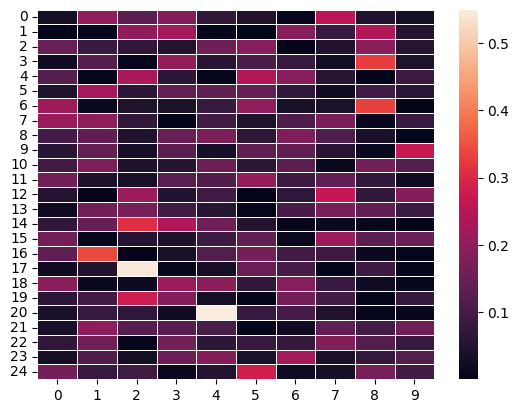

In [ ]:
sns.heatmap(best_model_rnd.emissionprob_,linewidths=0.5, linecolor='white')

<Axes: xlabel='n_comp', ylabel='mean_score'>

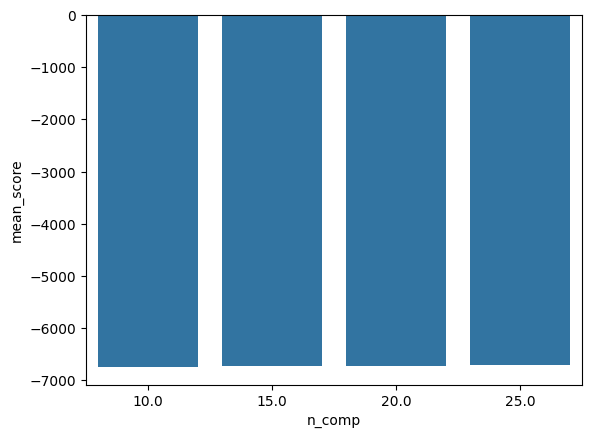

In [ ]:
sns.barplot(average_model_rnd_scores['mean_score'])


# Shuffled mix


In [ ]:
print(X_train.shape)
X_sh = np.concatenate((X_train, X_test), axis = 1)
idx = np.random.rand(*X_sh.shape).argsort(axis=1)
X_sh = np.take_along_axis(X_sh,idx,axis=1)


best_shuffled_model, shuffled_model_average_scores = get_best_model(
    X_sh,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
    model_samples_num = 25,
    n_components =np.arange(10, 30, 5)
)
display(shuffled_model_average_scores)

(21, 80)


100%|██████████| 4/4 [01:04<00:00, 16.17s/it]


,mean_score,std_score
n_comp,,
10.0,-1965.794920,5.917722
15.0,-1957.630722,7.707469
20.0,-1945.597383,13.443670
25.0,-1935.769675,18.753437


<Axes: >

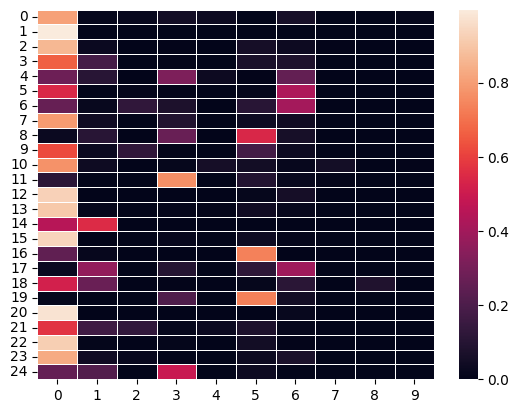

In [ ]:
sns.heatmap(best_shuffled_model.emissionprob_,linewidths=0.5, linecolor='white')

<Axes: xlabel='n_comp', ylabel='mean_score'>

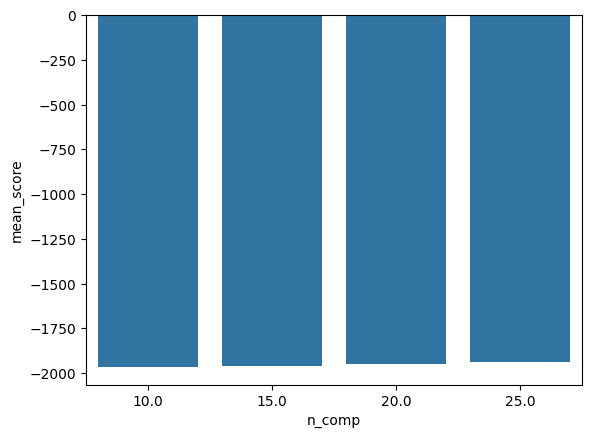

In [ ]:
sns.barplot( shuffled_model_average_scores['mean_score'])


<ipython-input-304-235b75f0ef5a>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(all_scores['mean_score'].groupby(all_scores['data']).mean(), order=['original','shuffled'])
<ipython-input-304-235b75f0ef5a>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = all_scores['mean_score'].groupby(all_scores['data']).mean().to_numpy()
<ipython-input-304-235b75f0ef5a>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this war

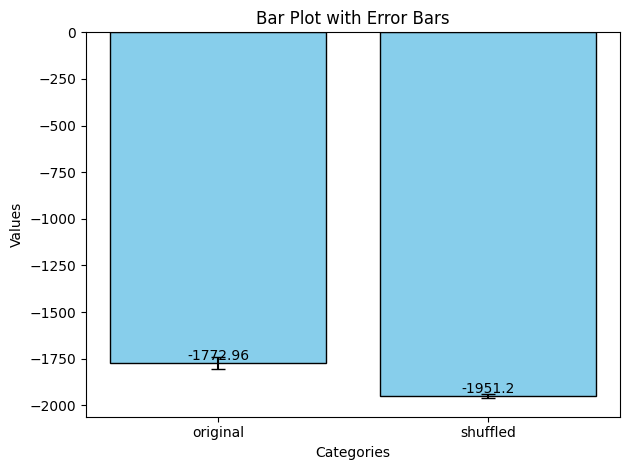

In [ ]:
average_model_scores['data'] = ['original']*len(average_model_scores)
average_model_rnd_scores['data'] = ['random']*len(average_model_scores)
shuffled_model_average_scores['data'] = ['shuffled']*len(average_model_scores)

# all_scores = pd.concat([average_model_scores,shuffled_model_average_scores,average_model_rnd_scores], axis = 0)
all_scores = pd.concat([average_model_scores,shuffled_model_average_scores], axis = 0)
all_scores['data'] = pd.Categorical(all_scores['data'])
# sns.barplot(all_scores['mean_score'].groupby(all_scores['data']).mean(), order=['original','shuffled','random'])
sns.barplot(all_scores['mean_score'].groupby(all_scores['data']).mean(), order=['original','shuffled'])


categories = ['original', 'shuffled']
values = all_scores['mean_score'].groupby(all_scores['data']).mean().to_numpy()
errors = all_scores['std_score'].groupby(all_scores['data']).mean().to_numpy()
# errors = [100,100,100,100]

bars = plt.bar(categories, values, yerr=errors, capsize=5, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Bar Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')

# Optionally, add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

Looking at the bar plot with the errorbars it is observed that shuffled is sighnificantly enough different from unshuffled sequence hence the pattern apart from frequency is comprehended by the model

#Removing zeroes completely

Seems that there's some order present in the sequence with removed zeroes. Though it seems it's due to the different frequencies of pecking rather than the order in which they are being pecked. Yet there is a slight about 1 persent worsening of scores as we turn from original sequence to shuffled it seems quite insighnificant compared to standard deviation


CURRENTLY ALL THE NO ZEROS PLORS HAVE ZEROS THAT STANDS FOR ONES AND ETC SINCE THE MODEL STARTS COUNTING AT ZERO.

P.S.: I FIXED IT FOR PLOTS

[1 2 3 4 5 6 7 8 9]


100%|██████████| 1/1 [00:00<00:00,  2.59it/s]



NO ZEROES
NO ZEROES SHUFFLED
NO ZEROES RANDOM
YES ZEROES


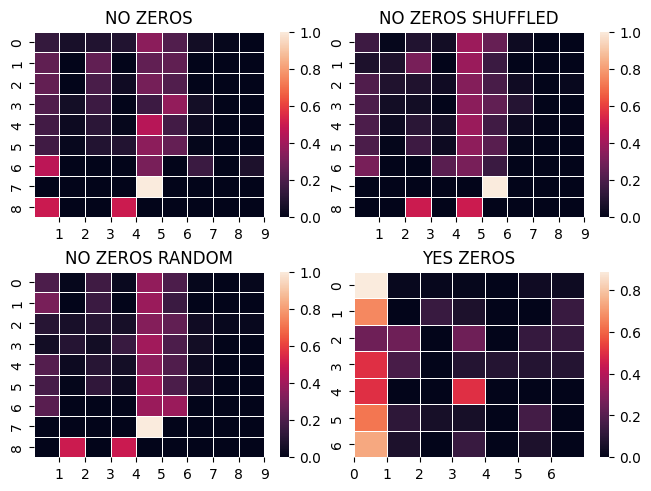

In [ ]:


tmp = X.copy()

X_no_zeroes = (tmp[tmp>0])[:420]

print(np.unique(X_no_zeroes))

model_no_zeroes, no_zeroes_average_score = get_best_model(
    X_no_zeroes-1,
    lengths = [140]*3,
    model_samples_num = 50,
    # n_components = np.arange(1, 15, 2),
    loc_emission = True,
    # n_possible_obs = 9
)

np.random.shuffle(X_no_zeroes[:140])
np.random.shuffle(X_no_zeroes[140:280])
np.random.shuffle(X_no_zeroes[280:])


model_no_zeroes_sh, no_zeroes_average_score_sh = get_best_model(
    X_no_zeroes-1,
    lengths = [140]*3,
    model_samples_num = 50,
    # n_components = np.arange(1, 15, 2),
    loc_emission = True,
    # n_possible_obs = 9
)


np.random.shuffle(X_no_zeroes)
model_nz_arb, nz_arb_average_score = get_best_model(
    # np.random.randint(1, 10, 420)-1,
    X_no_zeroes-1,
    lengths = [140]*3,
    model_samples_num = 50,
    # n_components = np.arange(1, 15, 2),
    loc_emission = True,
    # n_possible_obs = 9
)

model_regular, regular_average_score = get_best_model(
    X[:420],
    lengths = [140]*3,
    model_samples_num = 50,
    # n_components = np.arange(1, 15, 2),
    loc_emission = True,
    # n_possible_obs = 9
)
fig, ax = plt.subplots(2,2, constrained_layout = True)

print("\nNO ZEROES")
# display(no_zeroes_average_score)
# sns.heatmap(ax=ax[0,0], data=model_no_zeroes.emissionprob_)
sns.heatmap(ax=ax[0,0], data=model_no_zeroes.transmat_,linewidths=0.5, linecolor='white')
ax[0,0].set_title("NO ZEROS")
ax[0,0].set_xticks(np.arange(1,10),np.arange(1,10))
for i in np.arange(2, 20, 2):
    ax[0,0].axvline(x=i, linestyle='--', color='lightgray')

print("NO ZEROES SHUFFLED")
# display(no_zeroes_average_score_sh)
# sns.heatmap(ax=ax[0,1], data=model_no_zeroes_sh.emissionprob_)
sns.heatmap(ax=ax[0,1], data=model_no_zeroes_sh.transmat_,linewidths=0.5, linecolor='white')
ax[0,1].set_title("NO ZEROS SHUFFLED")
ax[0,1].set_xticks(np.arange(1,10),np.arange(1,10))

print("NO ZEROES RANDOM")
# display(nz_arb_average_score)
# sns.heatmap(ax=ax[1,0], data=model_nz_arb.emissionprob_)
sns.heatmap(ax=ax[1,0], data=model_nz_arb.transmat_,linewidths=0.5, linecolor='white')
ax[1,0].set_title("NO ZEROS RANDOM")
ax[1,0].set_xticks(np.arange(1,10),np.arange(1,10))

print("YES ZEROES")
# display(regular_average_score)
# sns.heatmap(ax=ax[1,1], data=model_regular.emissionprob_)
sns.heatmap(ax=ax[1,1], data=model_regular.transmat_,linewidths=0.5, linecolor='white')
ax[1,1].set_title("YES ZEROS")
ax[1,1].set_xticks(np.arange(0,7),np.arange(0,7))


no_zeroes_average_score['data'] = ['NO_ZEROS']*len(no_zeroes_average_score)
no_zeroes_average_score_sh['data'] = ['SHUFFLED']*len(no_zeroes_average_score_sh)
nz_arb_average_score['data'] = ['RANDOM']*len(nz_arb_average_score)
regular_average_score['data'] = ['YES_ZEROS']*len(regular_average_score)

no_zeros_scores = pd.concat([no_zeroes_average_score, no_zeroes_average_score_sh, nz_arb_average_score, regular_average_score], axis = 0)




In [ ]:
np.matmul(model_no_zeroes.emissionprob_, model_no_zeroes.emissionprob_.T)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

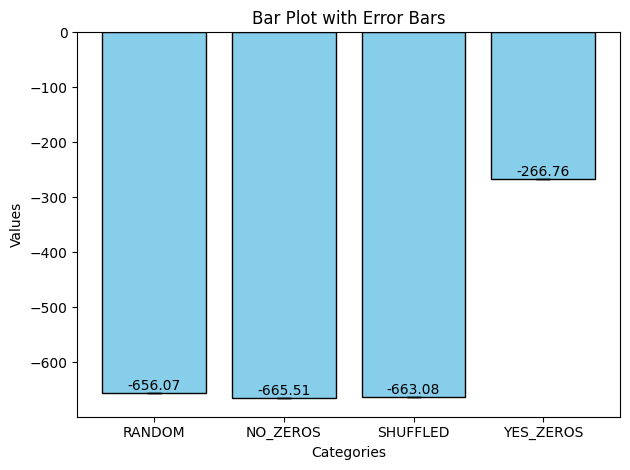

In [ ]:
# sns.barplot(no_zeros_scores['mean_score'].groupby(no_zeros_scores['data']).mean(), order = ['RANDOM', 'NO_ZEROS', 'SHUFFLED', 'YES_ZEROS'],
#             yerr = no_zeros_scores['std_score'].to_numpy().reshape(-1,1)
#             )
# no_zeros_scores['mean_score'].groupby(no_zeros_scores['data']).mean()

categories = ['RANDOM', 'NO_ZEROS', 'SHUFFLED', 'YES_ZEROS']
values = no_zeros_scores['mean_score'].groupby(no_zeros_scores['data']).mean().to_numpy()
errors = no_zeros_scores['std_score'].to_numpy()
# errors = [100,100,100,100]

bars = plt.bar(categories, values, yerr=errors, capsize=5, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Bar Plot with Error Bars')
plt.xlabel('Categories')
plt.ylabel('Values')

# Optionally, add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
# best_model.decode(X_test_sh[100:120].reshape(-1,1))

In [ ]:
# обучить на перемешанных последовательностях

# обучить модельку на последовательность, содержащую только желтые,
# потом достать матрицу переходов и скормить в качестве начального приближения
# Матрица эмиссий -- матрица P(x|h)

#посмотреть зависимость распределения от последовательности

# Only one color saving the 0s frequency

Gets better presumably because there's way less states for the chick. Getting one or zero in sequence is modelled better than more

NOT VERY SIGNIFICANT


100%|██████████| 6/6 [00:42<00:00,  7.09s/it]


,mean_score,std_score
n_comp,,
5.0,-1156.150839,39.225791
10.0,-1139.616843,35.322358
15.0,-1139.718981,10.567602
20.0,-1142.961328,24.761273
25.0,-1137.218528,15.261641
30.0,-1126.637963,15.293178


<Axes: >

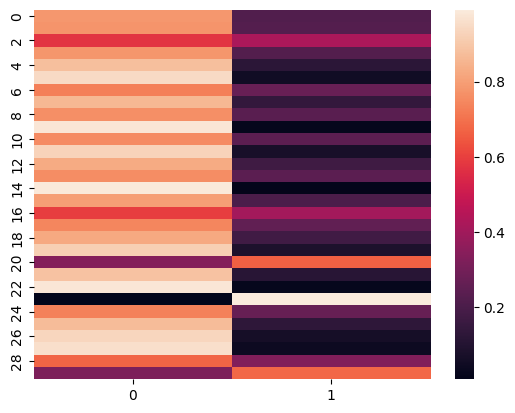

In [ ]:
X_sh = np.copy(X)
X_test_sh = np.copy(X_test)

X_sh[X_sh!=0] = np.ones_like(X_sh[X_sh!=0])
X_test_sh[X_test_sh!=0] = np.ones_like(X_test_sh[X_test_sh!=0])


best_model_zfi, model_zfi_average_score = get_best_model(
    X_sh,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
)
display(model_zfi_average_score)
sns.heatmap(best_model_zfi.emissionprob_)

# Only one color saving frequency of color 1

That's just mostly zeroes. The model is obviously way more confident

NOT VERY SIGNIFICANT

100%|██████████| 6/6 [00:42<00:00,  7.09s/it]


,mean_score,std_score
n_comp,,
5.0,-370.751765,3.208851
10.0,-369.281723,6.036959
15.0,-369.394698,5.324693
20.0,-368.649183,6.038580
25.0,-366.127474,5.838471
30.0,-368.677200,4.242221


<Axes: >

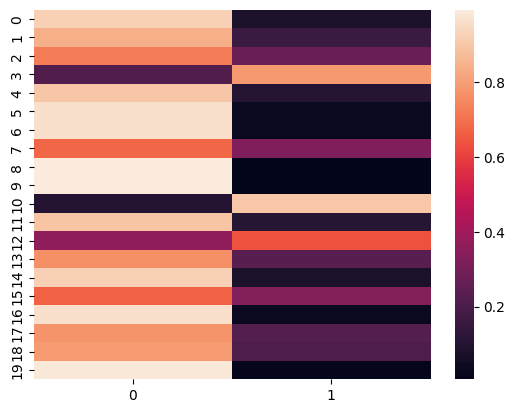

In [ ]:
X_sh = np.copy(X)
X_test_sh = np.copy(X_test)

X_sh[X_sh>1] = np.zeros_like(X_sh[X_sh>1])
X_test_sh[X_test_sh>1] = np.zeros_like(X_test_sh[X_test_sh>1])

best_model_ofi, model_ofi_average_score = get_best_model(
    X_sh,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
)
display(model_ofi_average_score)
sns.heatmap(best_model_ofi.emissionprob_)

## All that goes further is mostly trash

# Trying to fix the emissionprob matrix:
Makes inner states lightly more interpretable though does not affect the score


In [ ]:
meh, mehmeh = get_best_model(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
    loc_emission = True,
    n_components = np.arange(10, 30, 5)
)

100%|██████████| 4/4 [00:14<00:00,  3.74s/it]


,mean_score,std_score
n_comp,,
10.0,-1849.389934,3.488044e-12
15.0,-1812.249706,9.541838e+00
20.0,-1796.487110,1.144058e+01
25.0,-1752.497634,1.409649e+01


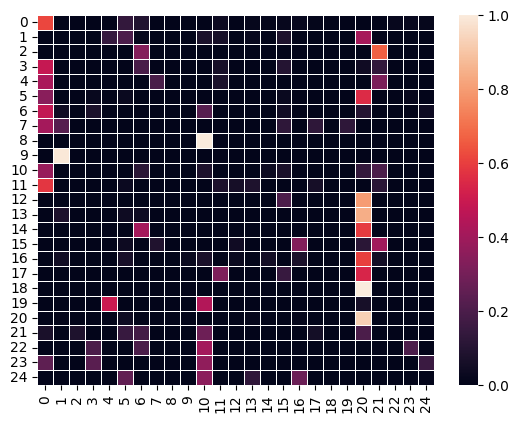

In [ ]:
# display(pd.DataFrame(best_model.emissionprob_).style.applymap(lambda x: "background-color: red" if x>0.5 else "background-color: white")) #P(color|hidden state)

sns.heatmap(pd.DataFrame(meh.transmat_),linewidths=0.5, linecolor='white')
display(mehmeh)

#Emission matrix is dependent on color

Don't think it's about color more like different frequencies with which the chick pecked

IRRELEVANT

<ipython-input-68-d58737a4c70d>:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0.01 else "background-color: blue"))
<ipython-input-68-d58737a4c70d>:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0.01 else "background-color: blue"))
<ipython-input-68-d58737a4c70d>:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0.01 else "background-color: blue"))
<ipython-input-68-d58737a4c70d>:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0

Color 1; frequency of pecks 0.028231292517006804; score -356.8586481017711: 


<ipython-input-68-d58737a4c70d>:25: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0.01 else "background-color: blue"))


,0,1,2,3,4,5,6,7,8,9
0,0.809705,0.000000,0.000007,0.000001,0.000000,0.158608,0.002469,0.029189,0.000000,0.000021
1,0.000000,0.000239,0.239529,0.000000,0.000000,0.009438,0.390342,0.000076,0.090078,0.270299
2,0.041279,0.000011,0.000002,0.000000,0.411034,0.000000,0.116866,0.169886,0.000286,0.260636
3,0.000000,0.000000,0.000000,0.000004,0.005806,0.471431,0.000000,0.522662,0.000001,0.000097
4,0.000000,0.668558,0.000000,0.303444,0.000001,0.000000,0.026551,0.001430,0.000000,0.000015
5,0.000076,0.000000,0.002483,0.000000,0.004818,0.084739,0.001559,0.000186,0.906132,0.000005
6,0.000914,0.000000,0.002002,0.120297,0.138911,0.094859,0.000008,0.000000,0.003203,0.639806
7,0.000000,0.000020,0.000000,0.149263,0.000000,0.003437,0.233837,0.093820,0.519622,0.000000
8,0.000072,0.000000,0.000338,0.747083,0.005749,0.000000,0.001670,0.245088,0.000000,0.000000
9,0.000478,0.002124,0.000036,0.000002,0.027635,0.404667,0.531220,0.002748,0.000000,0.031089


Color 2; frequency of pecks 0.004421768707482994; score -81.3570664585958: 


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.183014,0.000003,0.000000,0.000005,0.060500,0.604008,0.000013,0.012197,0.140261
1,0.000731,0.334604,0.000000,0.000869,0.000000,0.002111,0.636670,0.000023,0.000422,0.024571
2,0.513819,0.003665,0.000001,0.000000,0.012290,0.019604,0.000000,0.320472,0.065283,0.064868
3,0.912951,0.000000,0.000000,0.080146,0.000151,0.000568,0.000000,0.000011,0.000000,0.006173
4,0.000001,0.070547,0.009367,0.000313,0.709958,0.051351,0.000000,0.000000,0.158212,0.000252
5,0.000005,0.396073,0.000000,0.013032,0.000000,0.542739,0.047884,0.000005,0.000000,0.000261
6,0.000003,0.000202,0.024601,0.129832,0.000068,0.000000,0.000000,0.817942,0.027301,0.000051
7,0.201443,0.003866,0.262013,0.000000,0.532569,0.000000,0.000001,0.000000,0.000104,0.000004
8,0.170642,0.340949,0.000000,0.000063,0.419718,0.000002,0.000040,0.068558,0.000027,0.000000
9,0.022989,0.000128,0.000017,0.000000,0.974392,0.000000,0.002393,0.000079,0.000000,0.000002


Color 3; frequency of pecks 0.017006802721088437; score -252.16422348664597: 


,0,1,2,3,4,5,6,7,8,9
0,0.039325,0.002773,0.000042,0.000000,0.000338,0.952857,0.003919,0.000000,0.000001,0.000745
1,0.000000,0.000000,0.019368,0.056780,0.000000,0.876733,0.020469,0.000000,0.026649,0.000001
2,0.000000,0.000380,0.000000,0.000002,0.000080,0.984661,0.005591,0.000622,0.008664,0.000000
3,0.000003,0.000035,0.062729,0.746455,0.000001,0.186393,0.000000,0.004262,0.000117,0.000004
4,0.000018,0.015431,0.028016,0.131226,0.033724,0.405309,0.043158,0.000000,0.008870,0.334248
5,0.667391,0.000001,0.113061,0.199834,0.002956,0.000000,0.000000,0.016730,0.000006,0.000021
6,0.007471,0.000007,0.000002,0.000029,0.015907,0.000107,0.000011,0.976243,0.000225,0.000000
7,0.000001,0.000000,0.176272,0.000000,0.334620,0.384593,0.000073,0.081822,0.009140,0.013481
8,0.006591,0.095900,0.009832,0.000564,0.393518,0.010015,0.005791,0.000329,0.000035,0.477425
9,0.003230,0.197578,0.000005,0.000000,0.002082,0.000000,0.208012,0.000000,0.111866,0.477227


Color 4; frequency of pecks 0.006802721088435374; score -117.86487305001818: 


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.478212,0.000006,0.000001,0.000810,0.000000,0.439954,0.000000,0.080975,0.000042
1,0.000000,0.000001,0.001691,0.007999,0.745717,0.086082,0.000000,0.146170,0.012340,0.000000
2,0.000015,0.000000,0.000007,0.582348,0.000024,0.014652,0.233727,0.167883,0.000032,0.001311
3,0.000000,0.024387,0.082658,0.000000,0.010167,0.857696,0.000001,0.000000,0.025082,0.000010
4,0.451501,0.008811,0.538878,0.000000,0.000008,0.000000,0.000110,0.000098,0.000258,0.000335
5,0.000000,0.000000,0.092721,0.660511,0.024980,0.005437,0.216249,0.000016,0.000000,0.000085
6,0.001040,0.000000,0.000009,0.000023,0.002818,0.000000,0.567043,0.408588,0.007246,0.013233
7,0.000000,0.000002,0.999788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210,0.000000
8,0.002844,0.009406,0.107983,0.000321,0.034629,0.223328,0.227136,0.000514,0.393830,0.000008
9,0.001123,0.343992,0.094686,0.000000,0.210988,0.000001,0.000000,0.000000,0.349210,0.000000


Color 5; frequency of pecks 0.05612244897959184; score -626.3440667587267: 


,0,1,2,3,4,5,6,7,8,9
0,0.138752,0.140465,0.612159,0.044522,0.000007,0.000001,0.000000,0.000000,0.002631,0.061464
1,0.000001,0.131553,0.062720,0.000001,0.153452,0.644611,0.000000,0.000296,0.004111,0.003256
2,0.816390,0.033756,0.000000,0.000047,0.000038,0.034249,0.000002,0.115519,0.000000,0.000000
3,0.000009,0.000023,0.000002,0.155577,0.038244,0.025989,0.595567,0.000000,0.184488,0.000100
4,0.000003,0.001070,0.000007,0.000000,0.273467,0.000000,0.000172,0.000004,0.724849,0.000427
5,0.000000,0.000009,0.020565,0.000000,0.002169,0.054523,0.000149,0.277181,0.178119,0.467285
6,0.000001,0.000585,0.000002,0.350630,0.000000,0.390901,0.238592,0.000000,0.000018,0.019271
7,0.000000,0.000450,0.055238,0.288043,0.016215,0.120957,0.306614,0.197976,0.000032,0.014475
8,0.017882,0.030575,0.000000,0.000000,0.004157,0.784131,0.002396,0.018770,0.000856,0.141232
9,0.033235,0.000051,0.000003,0.955612,0.007360,0.000200,0.000000,0.000000,0.001966,0.001574


Color 6; frequency of pecks 0.03163265306122449; score -411.562941311543: 


,0,1,2,3,4,5,6,7,8,9
0,0.017976,0.000000,0.000000,0.445710,0.000567,0.000000,0.530117,0.000110,0.000000,0.005520
1,0.000008,0.000000,0.000005,0.000146,0.964591,0.000076,0.000290,0.000000,0.000176,0.034708
2,0.000584,0.377688,0.075594,0.004209,0.000000,0.000931,0.071035,0.469890,0.000071,0.000000
3,0.000291,0.909883,0.000321,0.033168,0.009299,0.001082,0.000000,0.000000,0.044943,0.001014
4,0.012451,0.326382,0.017971,0.523592,0.007694,0.000002,0.000048,0.109156,0.002706,0.000000
5,0.000000,0.000000,0.000000,0.003660,0.355927,0.000812,0.000001,0.000105,0.224215,0.415280
6,0.001277,0.158393,0.001684,0.000000,0.022752,0.001854,0.234214,0.055418,0.524408,0.000000
7,0.074742,0.049474,0.000000,0.000000,0.000000,0.662111,0.000000,0.000021,0.000333,0.213317
8,0.005826,0.000033,0.042927,0.019035,0.000000,0.000008,0.000000,0.926382,0.000009,0.005780
9,0.150453,0.000000,0.000000,0.032506,0.001387,0.415519,0.400134,0.000000,0.000000,0.000000


Color 7; frequency of pecks 0.00510204081632653; score -85.11277064286251: 


,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.000000,0.000000,0.265443,0.389644,0.009804,0.316884,0.018224,0.000000,0.000002
1,0.123044,0.000901,0.013524,0.004455,0.084186,0.319271,0.359072,0.000000,0.025869,0.069678
2,0.000005,0.064868,0.000000,0.033192,0.127739,0.772750,0.000000,0.001276,0.000003,0.000166
3,0.000000,0.000108,0.815123,0.000861,0.000001,0.128825,0.054055,0.000000,0.000000,0.001027
4,0.000000,0.030588,0.000017,0.103453,0.000076,0.000000,0.000000,0.863204,0.000089,0.002574
5,0.000047,0.000000,0.009230,0.021083,0.000000,0.938923,0.001530,0.029186,0.000000,0.000000
6,0.001761,0.000000,0.000001,0.983750,0.000000,0.000000,0.000006,0.003906,0.010573,0.000003
7,0.068452,0.000000,0.021571,0.904650,0.000001,0.004996,0.000321,0.000000,0.000000,0.000009
8,0.035540,0.229798,0.005047,0.382063,0.000000,0.000000,0.048363,0.139317,0.159872,0.000001
9,0.953138,0.017013,0.000000,0.000000,0.000298,0.000139,0.000078,0.028421,0.000848,0.000066


Color 8; frequency of pecks 0.0003401360544217687; score -8.827733699261202: 


,0,1,2,3,4,5,6,7,8,9
0,0.241913,0.413664,0.026323,0.000626,0.000034,0.000080,0.000125,0.317213,0.000001,0.000020
1,0.563521,0.004678,0.000075,0.000002,0.000675,0.003871,0.055859,0.000000,0.000003,0.371315
2,0.000718,0.000002,0.000150,0.000014,0.789781,0.028134,0.000046,0.175409,0.000000,0.005745
3,0.150994,0.000000,0.070063,0.008292,0.000001,0.677670,0.009635,0.044737,0.000000,0.038607
4,0.000000,0.000733,0.000112,0.972392,0.000000,0.000014,0.003928,0.000497,0.005323,0.017001
5,0.019949,0.680722,0.000059,0.017635,0.001244,0.267130,0.011771,0.000000,0.000052,0.001438
6,0.534550,0.000009,0.013422,0.038231,0.000142,0.081444,0.000803,0.000000,0.000035,0.331363
7,0.002638,0.038033,0.000003,0.006524,0.000013,0.000000,0.000289,0.000095,0.049564,0.902842
8,0.000000,0.019105,0.402552,0.000486,0.000000,0.018571,0.034026,0.037531,0.486372,0.001357
9,0.385341,0.000000,0.000000,0.000001,0.000000,0.608220,0.000000,0.002763,0.000000,0.003675


Color 9; frequency of pecks 0.0010204081632653062; score -20.685280827372523: 


,0,1,2,3,4,5,6,7,8,9
0,0.128480,0.017138,0.001423,0.002165,0.030050,0.000000,0.000000,0.000096,0.000004,0.820644
1,0.865221,0.000002,0.001495,0.000011,0.000094,0.000213,0.000006,0.000169,0.000803,0.131988
2,0.000051,0.000001,0.000000,0.000071,0.000382,0.976091,0.009968,0.000000,0.000266,0.013170
3,0.458062,0.000000,0.000000,0.000974,0.000000,0.002628,0.000306,0.000000,0.000000,0.538030
4,0.001457,0.000037,0.003319,0.021064,0.340199,0.303847,0.038749,0.291207,0.000120,0.000000
5,0.000002,0.000412,0.249591,0.228517,0.025626,0.039684,0.412389,0.000042,0.043735,0.000004
6,0.199985,0.182620,0.046655,0.004374,0.005317,0.001440,0.183444,0.319247,0.056891,0.000027
7,0.025867,0.000003,0.000278,0.000001,0.000000,0.000050,0.000000,0.329976,0.000001,0.643825
8,0.463652,0.000050,0.000006,0.060469,0.018383,0.236394,0.044306,0.000000,0.176739,0.000000
9,0.000000,0.000000,0.000369,0.041284,0.003636,0.001083,0.000000,0.951599,0.000001,0.002029


Text(0, 0.5, 'model score')

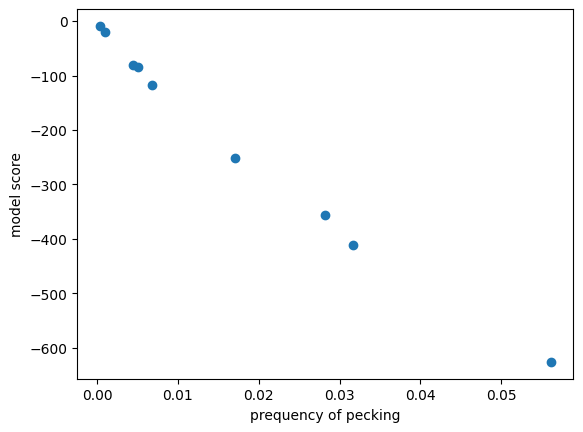

In [ ]:
best_score = best_model = None

emition_matrices = []
scores = []
peck_freq = []

for c in range(1,10):
    X_sh = np.copy(X)
    X_sh[(X_sh>0) & (X_sh!=c)] = np.zeros_like(X_sh[(X_sh>0) & (X_sh!=c)])
    X_test_sh = np.copy(X_test)
    X_test_sh[(X_test_sh>0) & (X_test_sh!=c)] = np.zeros_like(X_test_sh[(X_test_sh>0) & (X_test_sh!=c)])
    model = CategoricalHMM(
        n_components=10,
        # random_state=idx,
        )
    model.fit(
        X_sh.reshape(-1,1),
        lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length)
        # lengths=[len(df)]*(len(df.columns)+len(df_test.columns))
        )
    score = model.score(X_sh.reshape(-1,1), lengths=[serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length))
    scores.append(score)
    peck_freq.append(len(X_sh[X_sh==c])/len(X_sh))
    # print(f'Model color #{c}\tScore: {score}')
    emition_matrices.append(pd.DataFrame(model.transmat_).style.applymap(lambda x: "background-color: red" if x>0.01 else "background-color: blue"))


for i, mat in enumerate(emition_matrices):
    print(f"Color {i+1}; frequency of pecks {peck_freq[i]}; score {scores[i]}: ")
    display(mat)


plt.scatter(peck_freq, scores)
plt.xlabel('prequency of pecking')
plt.ylabel('model score')

Оформить!

Добавить plt.barplot

Попробовать добавить выделение состояний согласно частоте встречаемости

Добавить сетку на sns.heatmap чтобы быо проще читать

попробовать запихнуть в модель, обученную на правильных данных, и посмотреть будет ли проседать скор при попытке предсказать по ней шаффленную последовательность по сравнению с нормальной

По предсказанию последовательности клевания: у нас есть матрицы перехода, матрицы эмиссий и изначальные вероятности наблюдения. На обученной модели можно посмотреть вероятности, с которыми она предсказывает следующий шаг. Например, обучая на одном цвете, ожидаемо, что при генерации предсказаний на следующий клевок, веротяность клевков этого цвета будет падать:

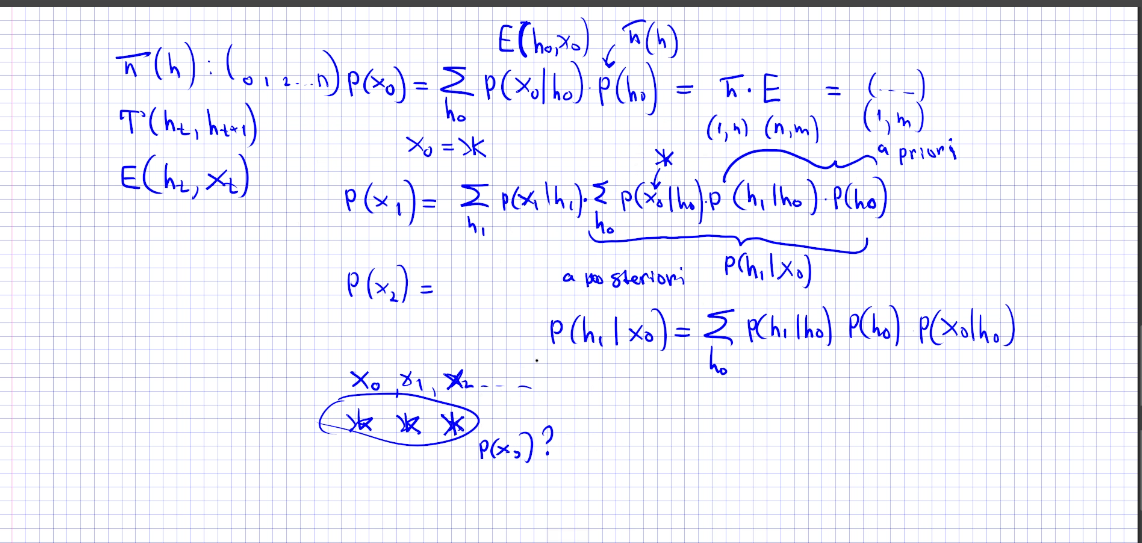

#Predicting further observations

Probability of the hidden state that generates the observation (obtained with model.predict_proba(observation) which returns probability of every state to produce the observation) initial_proba:
$$
p(h_0)
$$
Matrice of probabilities to observe state $x_0$ under condition that the hidden state $h_0$ $p(x_0|h_0)$ which is obtained from model.emissionproba_. Finally we need transition matrix $p(h_1|h_0)$ which is obtained from model.transmat_
so the probability to observe state $x_1$ can be spelled out as:
$$
p(x_1)=\sum_{h_1}p(x_1|h_1)p(h_1)
$$
probability of hidden state $h_1$:
$$
p(h_1)=\sum_{h_0}p(h_1|h_0)p(h_0)
$$
So,
$$
p(x_1)=\sum_{h_1}p(x_1|h_1)p(h_1)=\sum_{h_1}p(x_1|h_1)\sum_{h_0}p(h_1|h_0)p(h_0) = model.emissionprob_*model.transmat_*initial_proba
$$
Inductively, can be derived the formula for $p(x_n)$
$$
p(x_n)=model.emissionprob__ *model.transmat_ **n*initial_proba
$$

In [ ]:
def generate_probas(
    model,
    start_state,
    n_steps
):
    '''
    model: hmm.Categoricalhmm -- fitted model
    start_state: int -- initial state
    n_steps: int -- number of generational steps
    ***
    return:
    probability_destributions: list -- of probability n_steps distributions for n_steps
    '''
    initial_proba = model.predict_proba([[start_state]],
                        lengths = [1]
                        )
    print(initial_proba)
    probability_destributions = [
        np.matmul(np.matmul(model.emissionprob_.T,
                            np.linalg.matrix_power(model.transmat_.T, n)/np.sum(np.linalg.matrix_power(model.transmat_.T, n), axis = 0).reshape(-1,1)),
                  initial_proba.reshape(-1,1))
        for n in range(1,n_steps+1)]

    return probability_destributions




In [ ]:
[(np.argmax(best_model.predict_proba(
    [[1]]*n,
    lengths = [n]
    ),axis = 1),
np.max(best_model.predict_proba(
    [[1]]*n,
    lengths = [n]
    ),axis = 1),)
 for n in range(1, 11)]


In [ ]:
#sanity check for the function performing correctly: if the function performs correctly every predicted probability vector should sum up to 1
best_model, average_model_scores = get_best_model(
    X,
    lengths = [serie_length]*len(df)*((len(df.columns)+len(df_test.columns))//serie_length),
    model_samples_num = 25,
    n_components = np.arange(10, 30, 5)
)

probas = generate_probas(
    best_model,
    0,
    10
)

[np.sum(proba) for proba in probas]


100%|██████████| 4/4 [01:05<00:00, 16.42s/it]

[[5.12502986e-29 8.68238130e-11 7.81133855e-08 4.45017639e-06
  2.67962899e-08 2.13160801e-30 3.71333697e-20 3.29587607e-22
  1.70160988e-10 9.60846560e-01 7.14788667e-06 5.50978568e-13
  3.76431034e-49 9.05522627e-36 2.74921025e-31 9.24863800e-10
  7.24472458e-09 6.65280337e-09 4.34673355e-36 1.76550494e-03
  3.73762069e-02 1.52571574e-16 2.14382481e-12 2.27265374e-18
  9.75817846e-09]]


[1.0000000000000004,
 1.0000000000000004,
 1.0000000000000004,
 1.0000000000000004,
 1.0000000000000002,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0000000000000002]

#The probability of observing the skipping of a peck

the only question is what considered error: apperantly we know score as a metric for credibility of a model, but i am not sure as to how do a get it in for of a computational error for transmat emissionprob and initial_proba (i presume that the error by the 50th predicted element is horrendous but i am stuck at how to assess it)

[[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.961 0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.002 0.037 0.    0.    0.
  0.   ]]


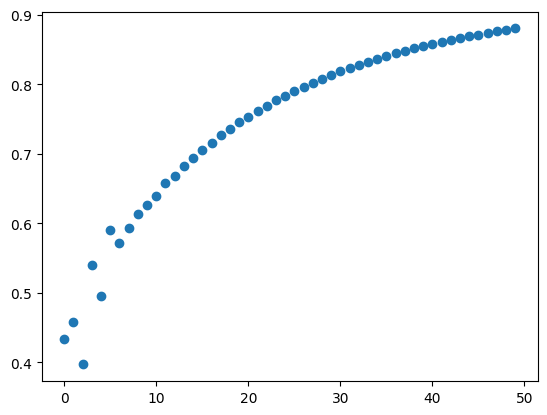

In [ ]:
probas = generate_probas(
    best_model,
    0,
    50
)
np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=3, suppress=True, threshold=1000, formatter=None)
# probas
plt.scatter(np.arange(50),[proba[0] for proba in probas])

#Probability of pecking one color over and over e.g. color 2

Obvious and expected decline in probability with the extending the sequence

[[0.    0.    0.    0.001 0.    0.    0.    0.    0.    0.    0.994 0.
  0.    0.    0.    0.    0.    0.    0.    0.005 0.    0.    0.    0.
  0.   ]]


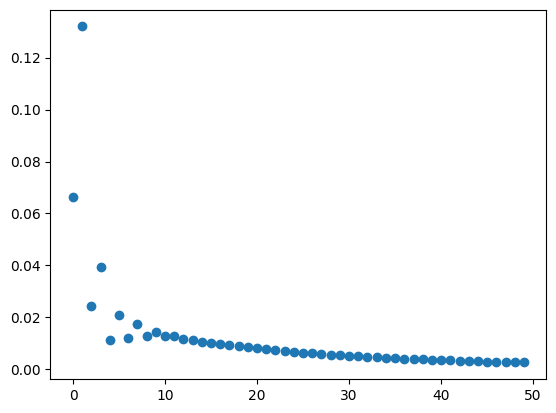

In [ ]:
c = 2
probas = generate_probas(
    best_model,
    2,
    50
)
np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=3, suppress=True, threshold=1000, formatter=None)
# probas
plt.scatter(np.arange(50),[proba[2] for proba in probas])

#No zeros
for some reason the model has issues predicting the hidden state. I seem to lack the knowledge as to why it's so coz it obviously work for colling fuction immediately after fitting the model

we are going to pick several colors and observe what happens to the probability of a model to predict it in its next step.

All pecks seem to fade into zero. Which is expected since we believe that the model learns to skip pecks on a familiar inedible objects. Yet I once again have concerns about the predictions for moree than 10 peck a time

In [ ]:
tmp = X.copy()
X_no_zeroes = (tmp[tmp>0])[:420]

model_no_zeroes, no_zeroes_average_score = get_best_model(
    X_no_zeroes-1,
    lengths = [140]*3,
    model_samples_num = 50,
    loc_emission = True,
)


100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


[[nan nan nan nan nan nan nan nan nan]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


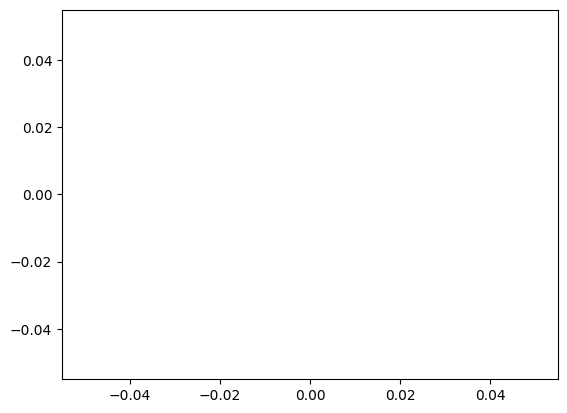

In [ ]:
c = 1 #color #2 as i mentioned earlier the categoricalhmm preferes to work with sets that starts with 0
probas = generate_probas(
    model_no_zeroes,
    c,
    10
)

print(model_no_zeroes.predict_proba([[0]], lengths = [1]))
plt.scatter(np.arange(10),[proba[c] for proba in probas])
# [np.sum(proba) for proba in probas]

[[nan nan nan nan nan nan nan nan nan]]


/usr/local/lib/python3.10/dist-packages/hmmlearn/utils.py:55: RuntimeWarning: invalid value encountered in subtract
  a -= a_lse


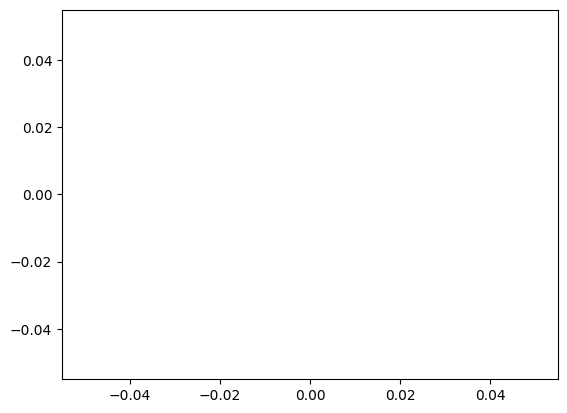

In [ ]:
c = 3 #color #4 as i mentioned earlier the categoricalhmm preferes to work with sets that starts with 0
probas = generate_probas(
    model_no_zeroes,
    c,
    50
)
plt.scatter(np.arange(50),[proba[c] for proba in probas])

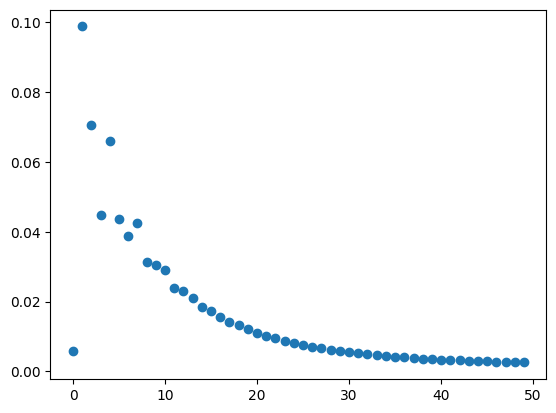

In [ ]:
c = 4 #color #5 as i mentioned earlier the categoricalhmm preferes to work with sets that starts with 0
probas = generate_probas(
    best_model,
    c,
    50
)
plt.scatter(np.arange(50),[proba[c] for proba in probas])

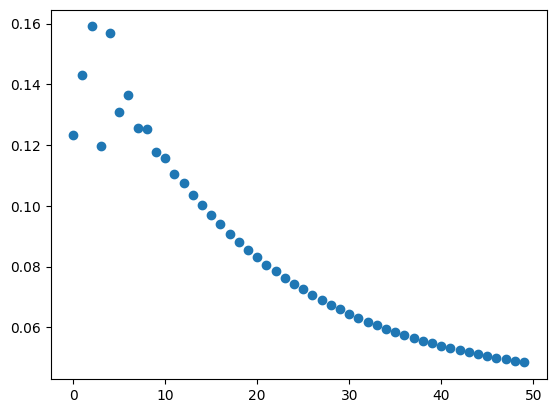

In [ ]:
c = 5 #color #6 as i mentioned earlier the categoricalhmm preferes to work with sets that starts with 0
probas = generate_probas(
    best_model,
    c,
    50
)
plt.scatter(np.arange(50),[proba[c] for proba in probas])

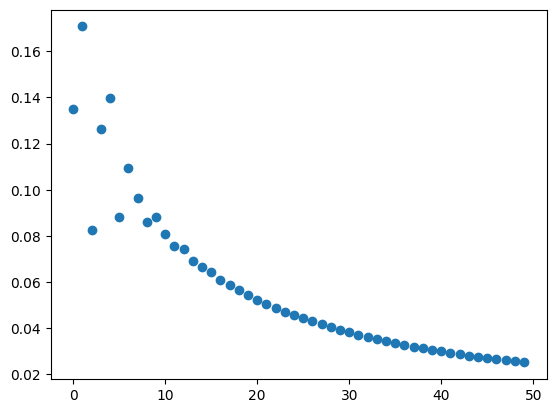

In [ ]:
c = 6 #color #7 as i mentioned earlier the categoricalhmm preferes to work with sets that starts with 0
probas = generate_probas(
    best_model,
    c,
    50
)
plt.scatter(np.arange(50),[proba[c] for proba in probas])

Менять seed в hmm! (хотя бы по 5 разных)
сделать датафрейм keys: number of component, score

сделать циклы с различными компонентами, а внутри него с разными seed

сделать датафрейм и разбить на группы по количеству компонент

для шаффленной последовательности посмотреть дисперсию скора
___
fill between -- вместо еррорбаров для пропуска клевков -- усреднить и добавить ошибку (сделать отдельные для тест и трейн)
Попробовать сделать скользящее окно по пекам вместо просто разбиения по 20

зависимость скора от количества компонент график для случайной, шаффленной и обычной последовательности

пункты делать в последовательности 1,2,4,5,3

Про порядок и пункт 3:
скрытое состояние hmm отражает историю наблдений

Попробовать исследовать последовательность, где нет нулей

Зафиксировать матрицу эмиссии:
Выделяем для нулевого элемента несколько состояний x = 0, h = (0,1,2), остальные зануляются (см скрин)

как зафиксировать матрицу эмиссий (не факт, что можно сделать в этой библиотеке)
но можно задать емишн проб тоже как на скрине (пункт 3б, а 3а на потом если умею до среды) если что спросить про код

Собрать лучший результат для таблицы и сделать с ним барплот


#ТУДУ
Без нулей собрать сделать на длины последовательности
Сделать в фиксированной матрице емиссии пропорциональность количества зафиксированного состония
Разделение линиями хитмапы только соседних состояний

Про предсказание при условии прошедших наблюдений:

Подавать сначала одно наблюдение, потом два, и так далее и смотреть на предикт проба от них

In [ ]:
from collections import Counter
import math
frequencies = Counter(X)
n_components = 10
diag_ = (
    [
        [i]*(math.ceil(frequencies[i]/len(X)*n_components)) for i in frequencies.keys()
    ]
    )
np.set_printoptions(edgeitems=3,infstr='inf', linewidth=75, nanstr='nan', precision=1, suppress=True, threshold=1000, formatter=None)
freqs = np.array([frequencies[i] for i in frequencies.keys() if i != 0])/len(X)*100
print(freqs)
idxs = np.array([i for i in frequencies.keys() if i != 0])
print(idxs)

[2.8 0.4 1.7 0.7 5.6 3.2 0.5 0.1 0. ]
[1 2 3 4 5 6 7 9 8]


In [ ]:
n, n_possible_obs = 30, 10
diag = np.array([[i]*(n//n_possible_obs) for i in range(n)]).flatten()
diag

array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 11,
       11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 16, 16,
       17, 17, 17, 18, 18, 18, 19, 19, 19, 20, 20, 20, 21, 21, 21, 22, 22,
       22, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 26, 27, 27, 27, 28,
       28, 28, 29, 29, 29])